In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [10]:


df = pd.read_csv(r'C:\Users\Jairo\OneDrive\Documentos\ME_BreastCancer\data\raw\data.csv')


# Summary Statistics
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [11]:
# Missing Value Analysis
print(df.isnull().sum())


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          0        17.99         10.38          122.80   
1      842517          0        20.57         17.77          132.90   
2    84300903          0        19.69         21.25          130.00   
3    84348301          0        11.42         20.38           77.58   
4    84358402          0        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          0        21.56         22.39          142.00   
565    926682          0        20.13         28.25          131.20   
566    926954          0        16.60         28.08          108.30   
567    927241          0        20.60         29.33          140.10   
568     92751          1         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1

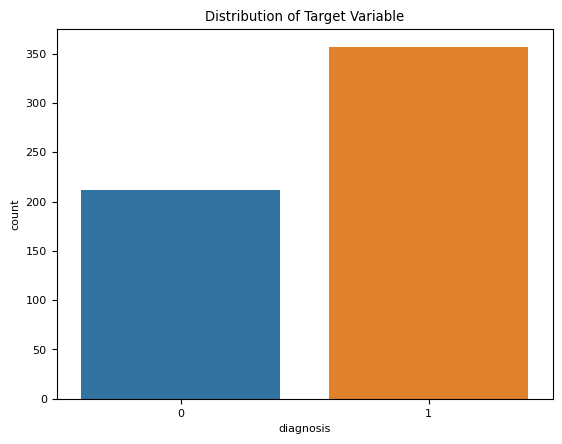

In [12]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'M' with 0 and 'B' with 1 in the column named 'column_name'
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})

# Print the updated DataFrame to verify the changes
print(df)

# Distribution of Target Variable
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Target Variable')
plt.show()

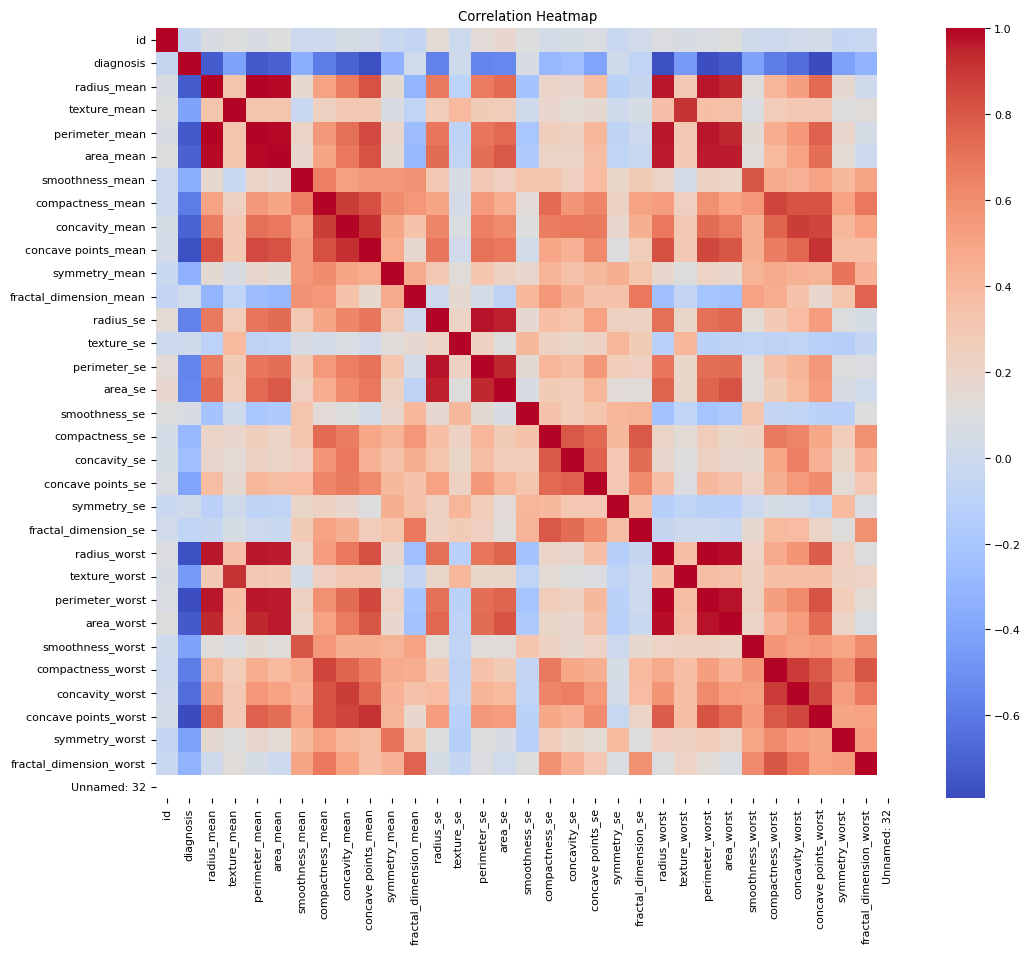

<Figure size 640x480 with 0 Axes>

In [13]:
# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.figure(facecolor='white')

plt.show()

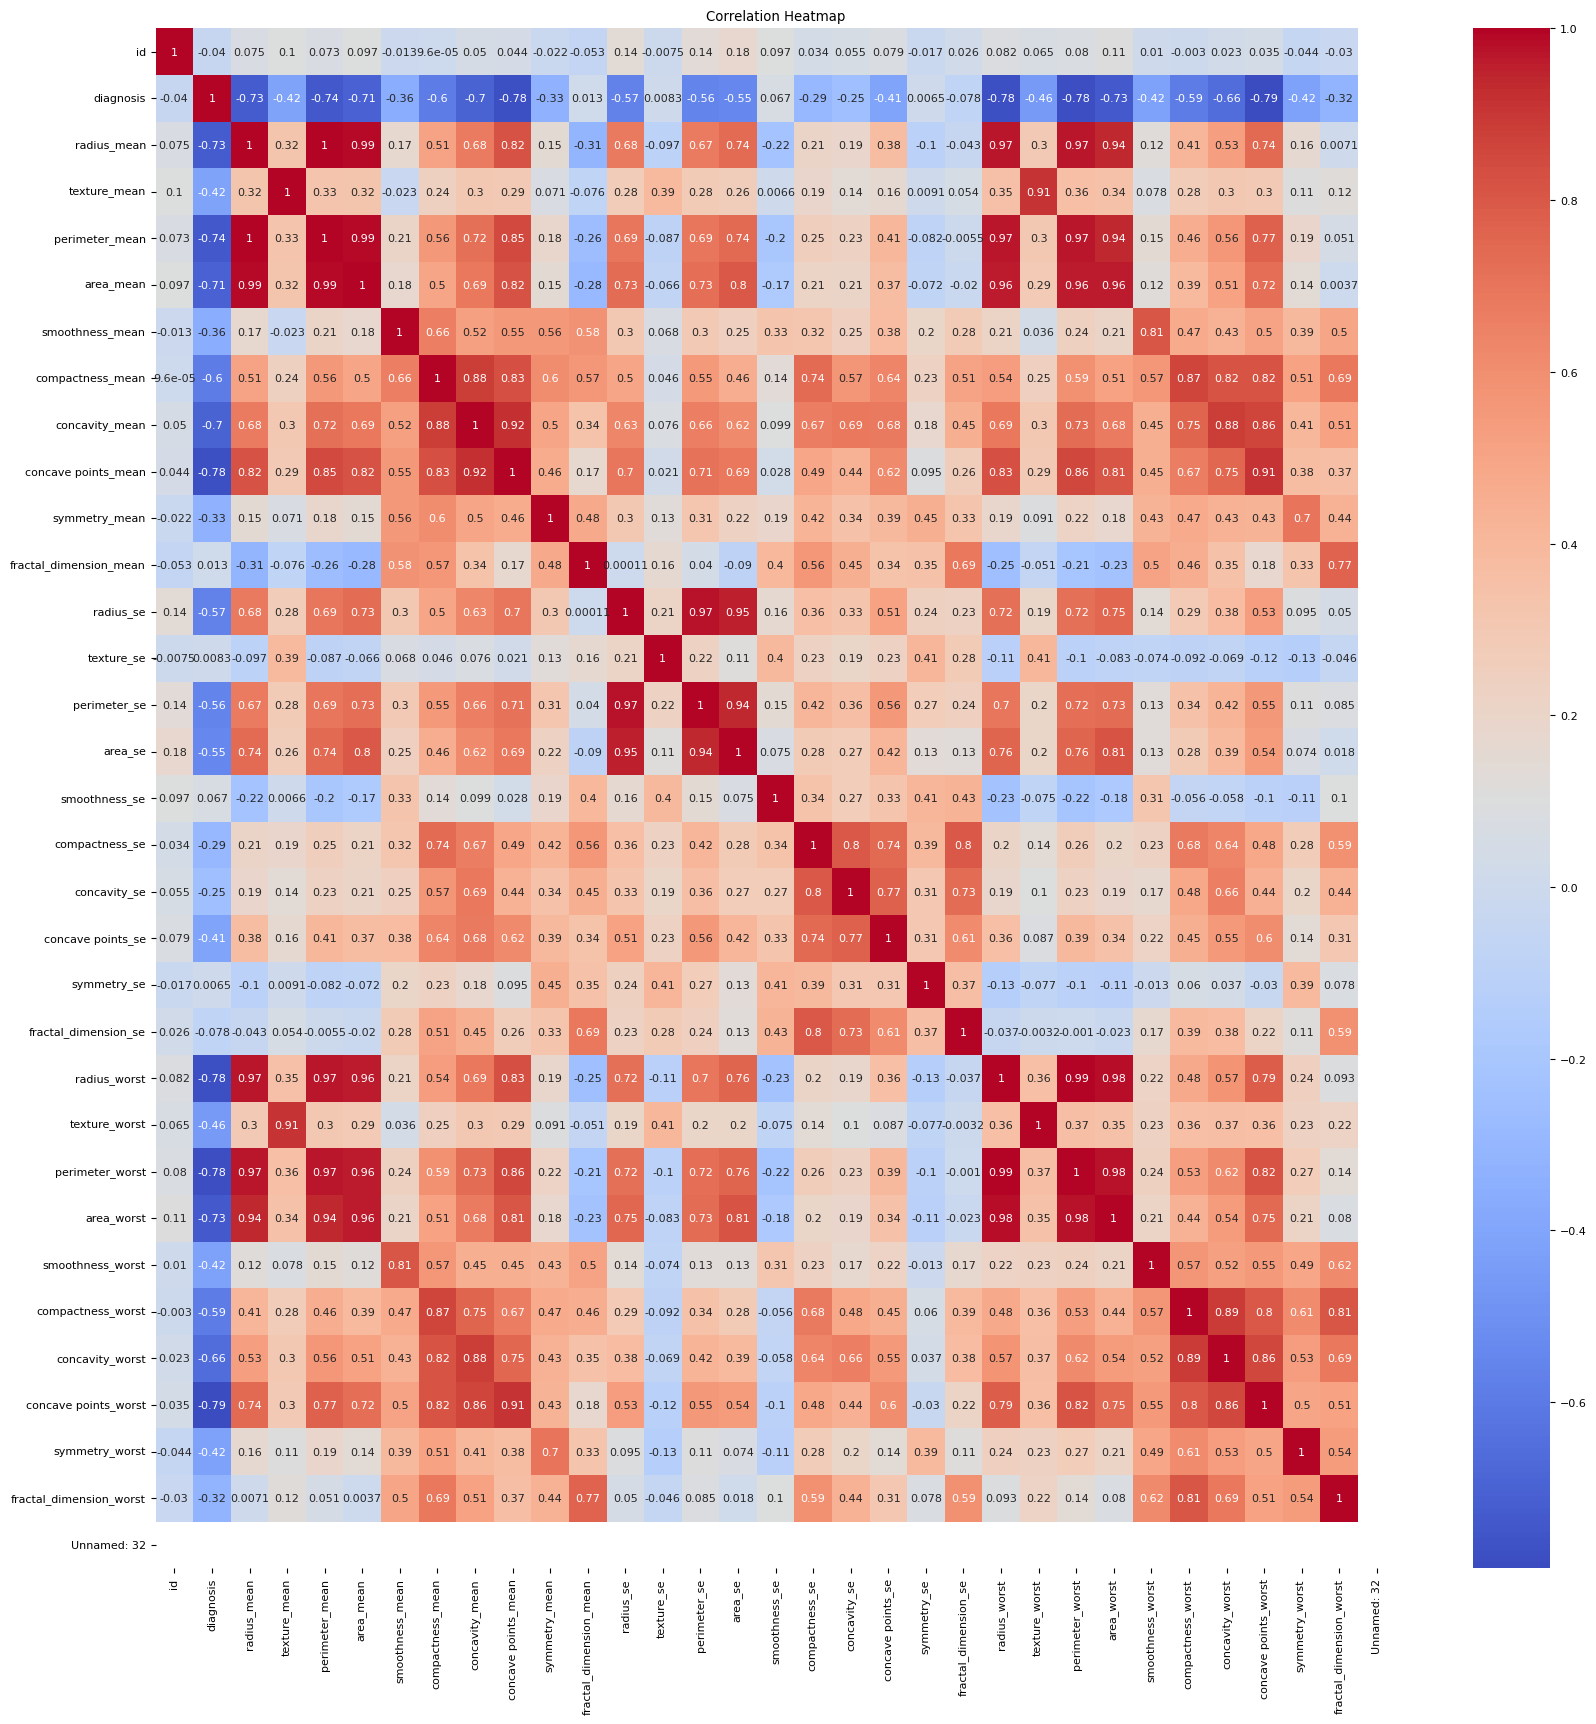

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing the features
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

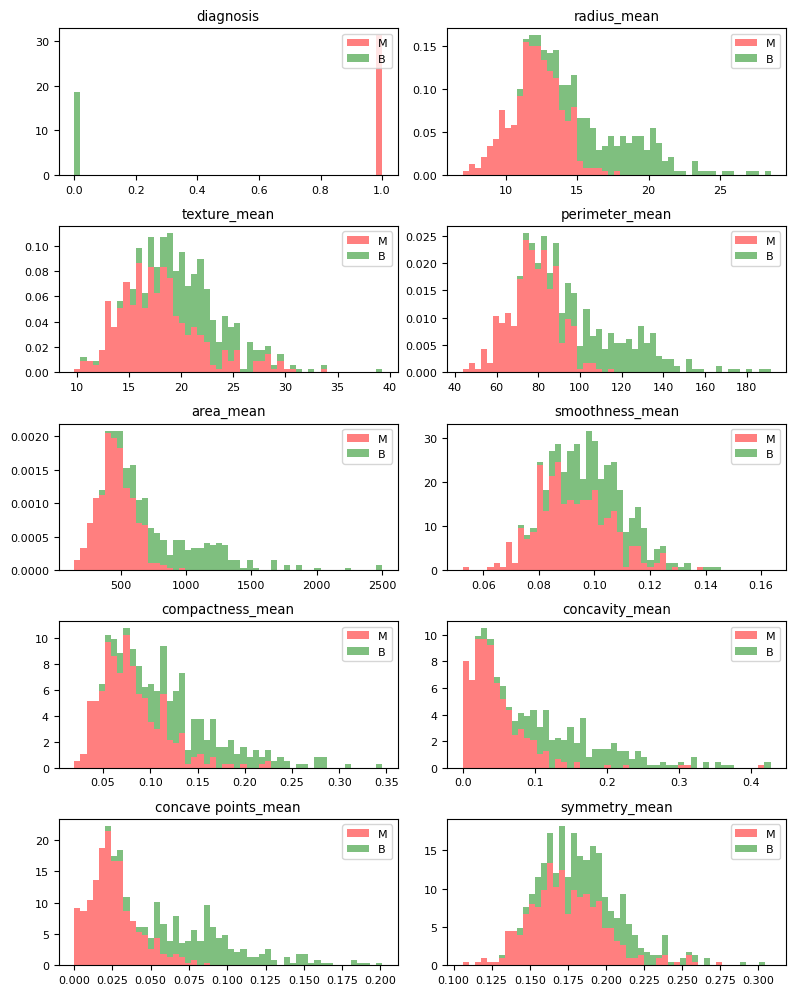

In [16]:
import numpy as np
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

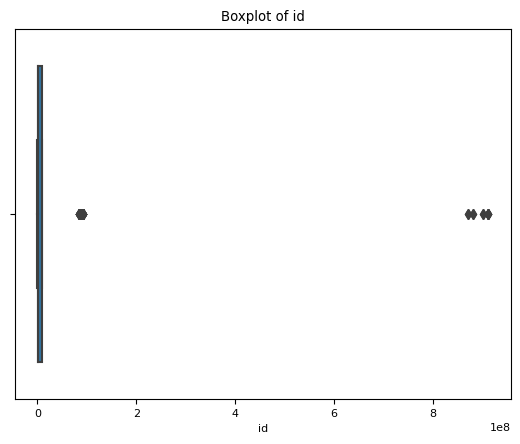

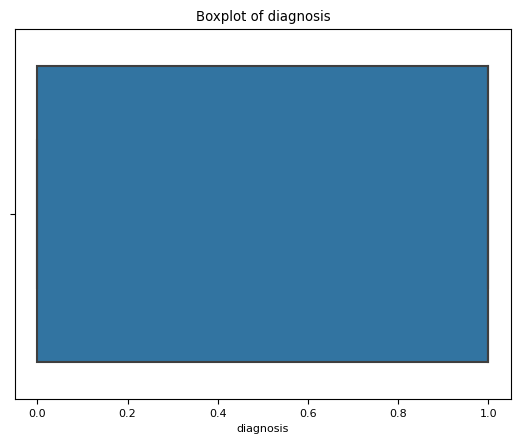

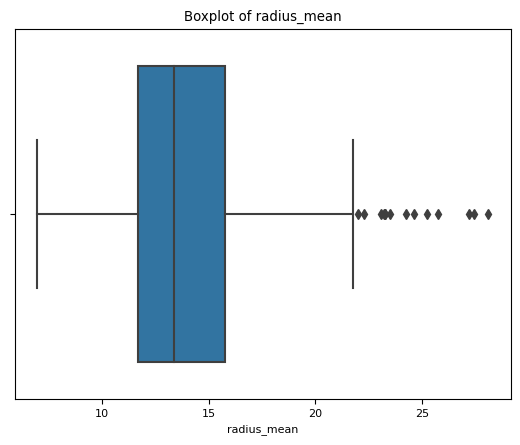

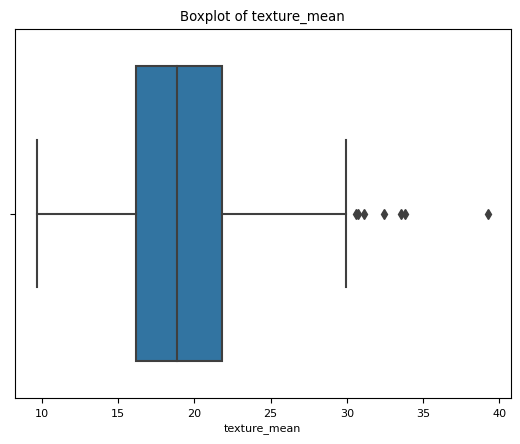

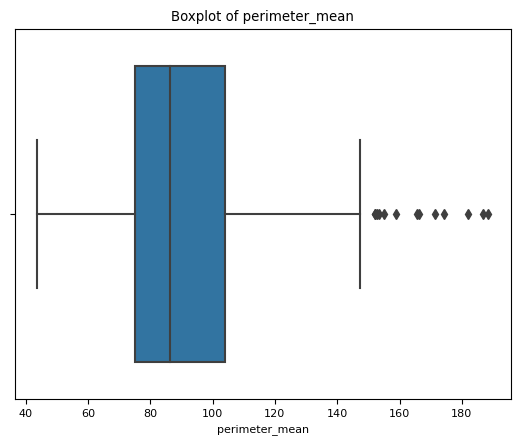

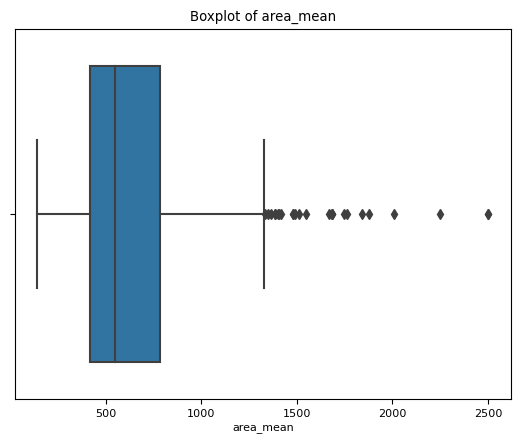

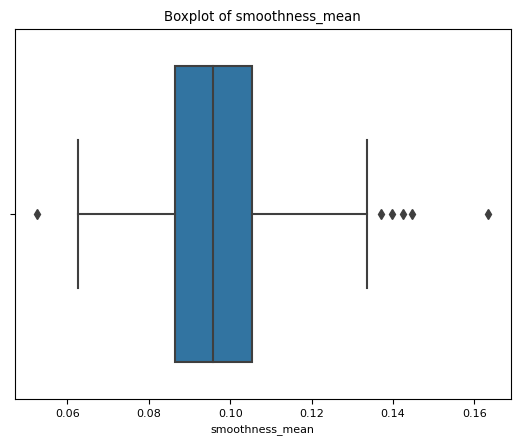

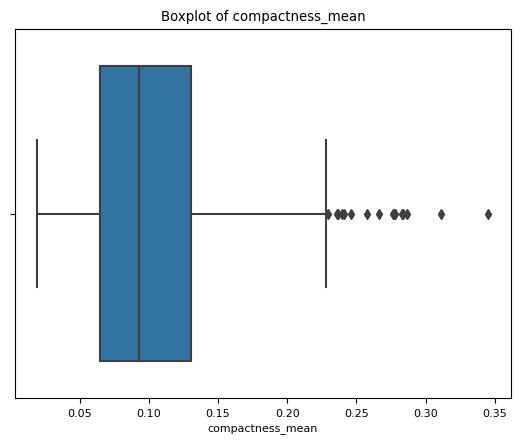

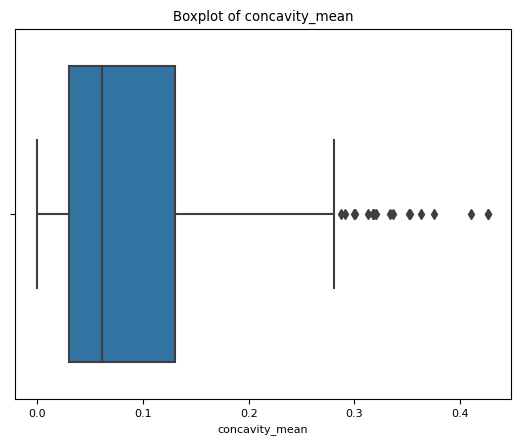

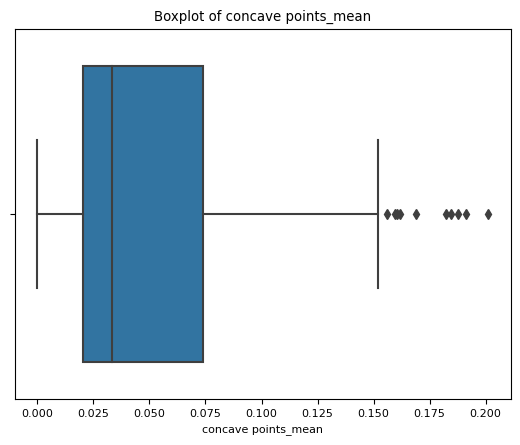

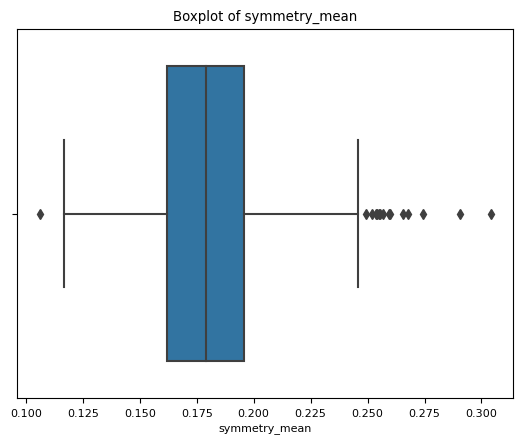

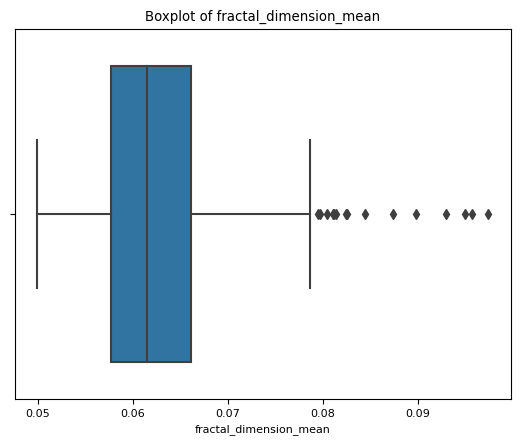

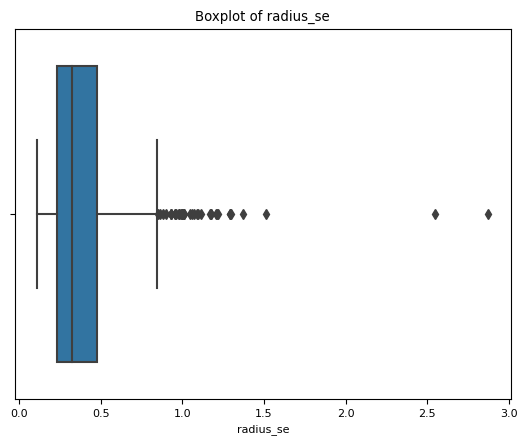

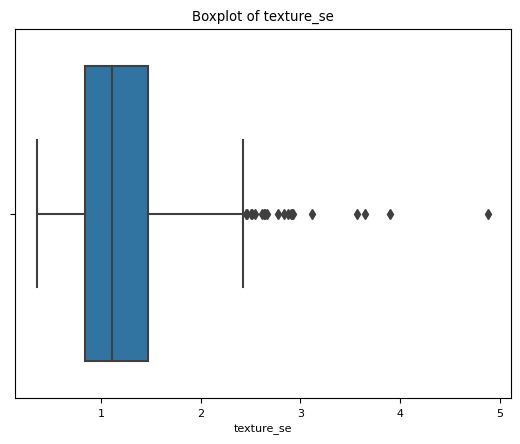

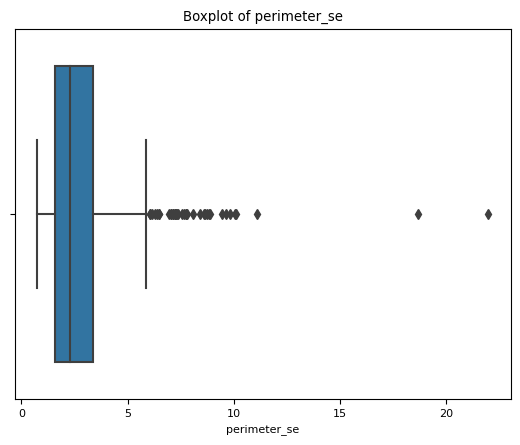

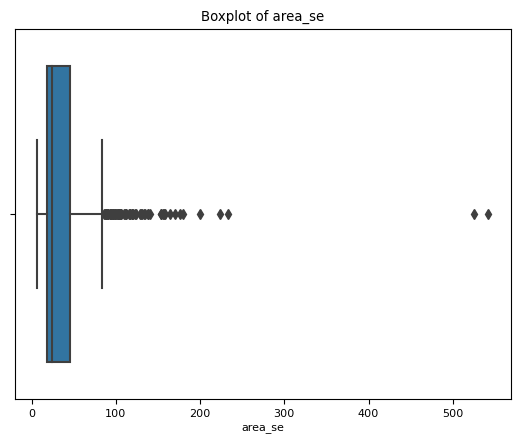

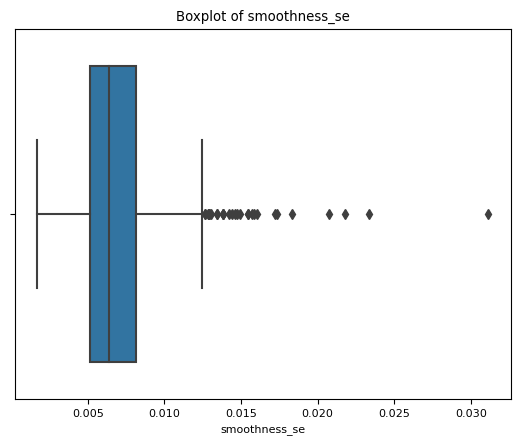

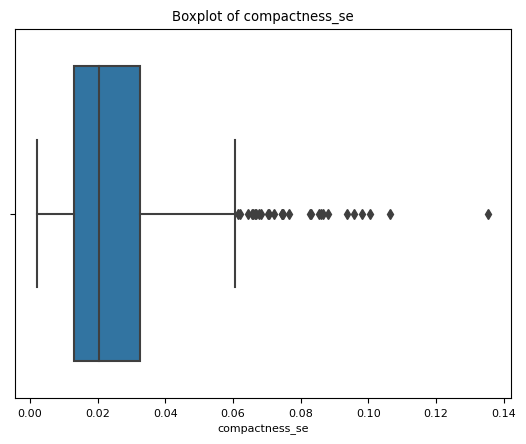

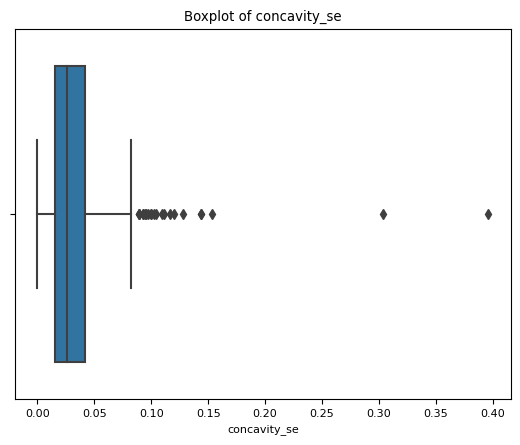

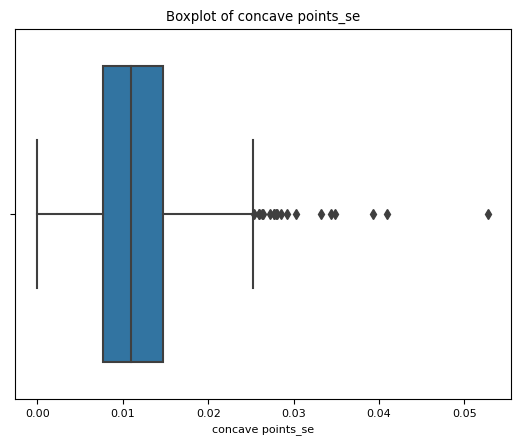

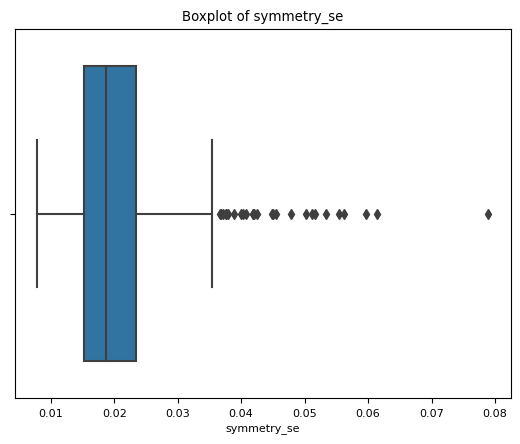

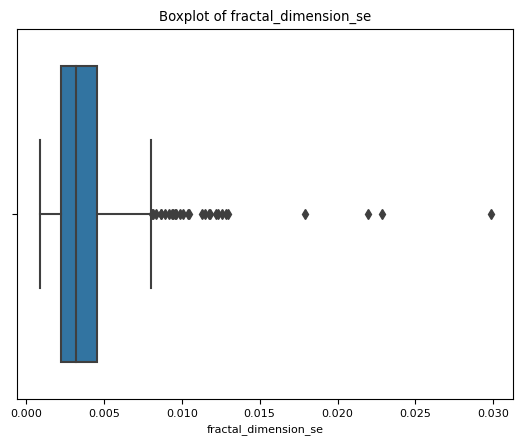

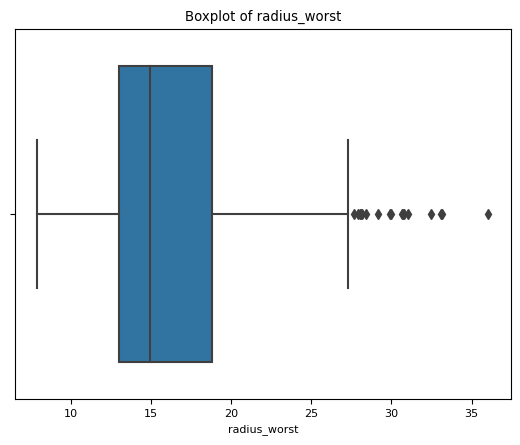

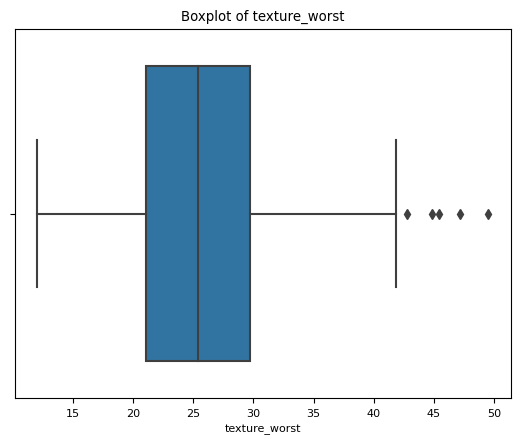

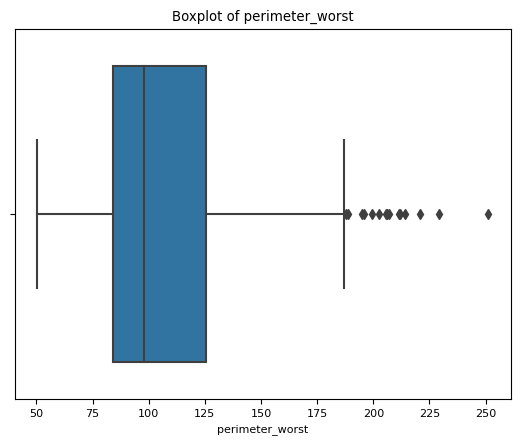

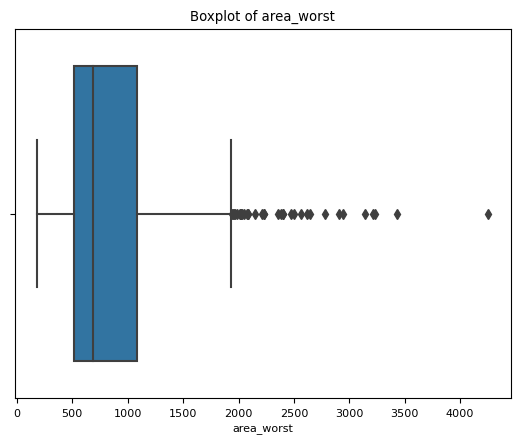

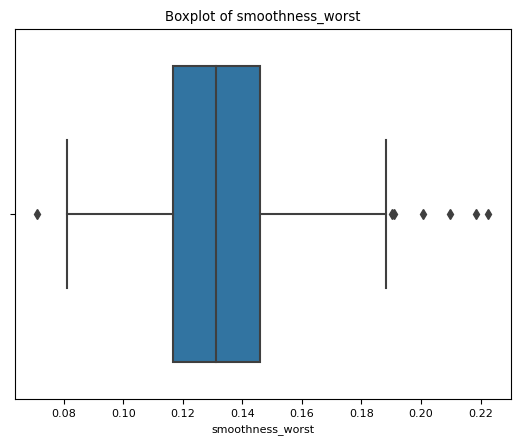

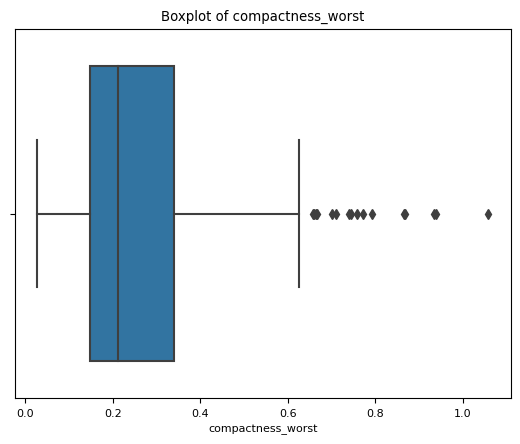

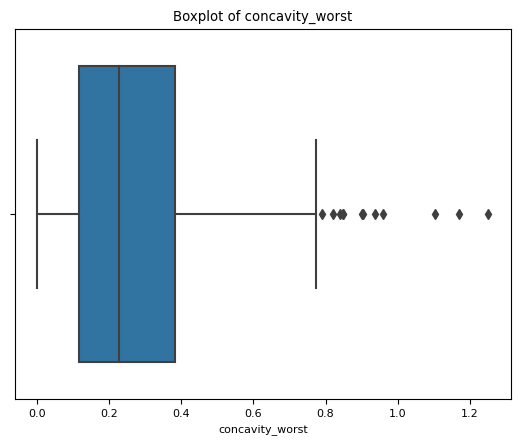

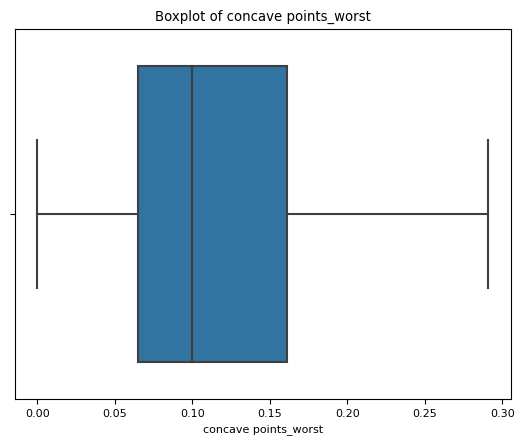

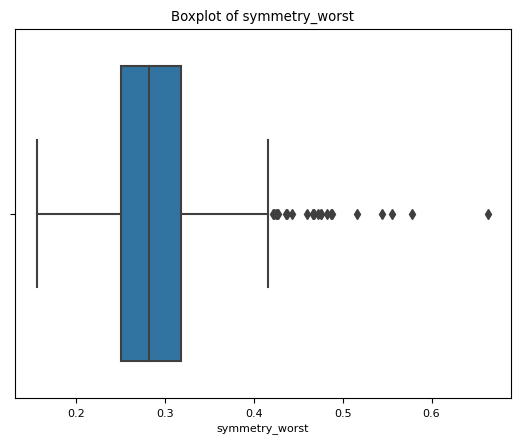

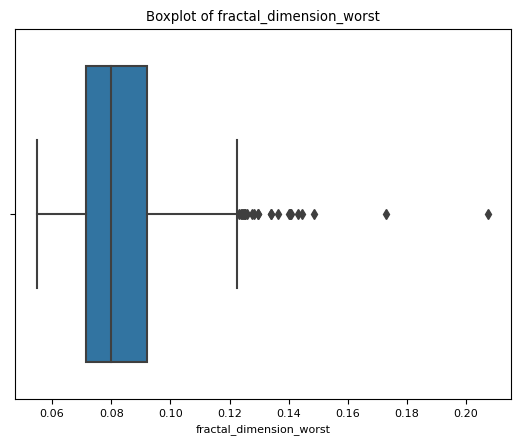

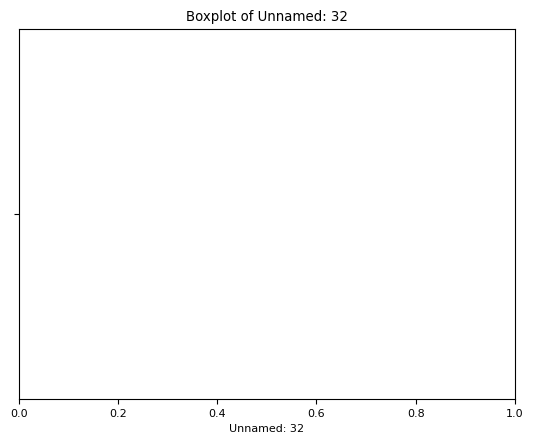

In [17]:
import seaborn as sns

# Box plot for outlier detection
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

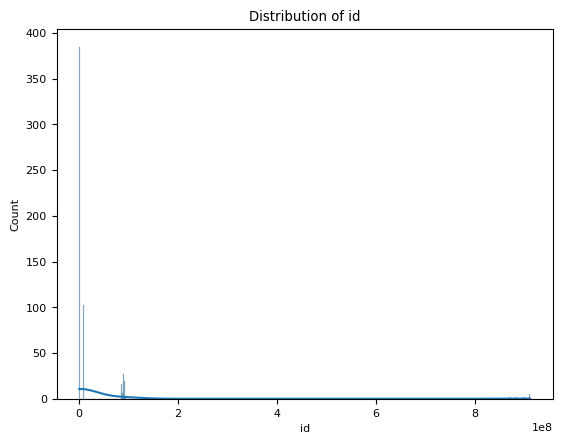

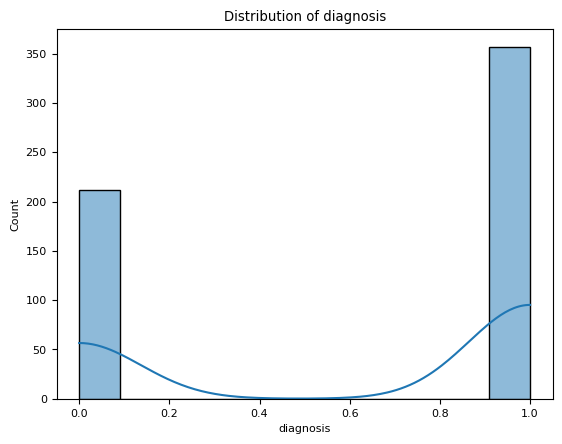

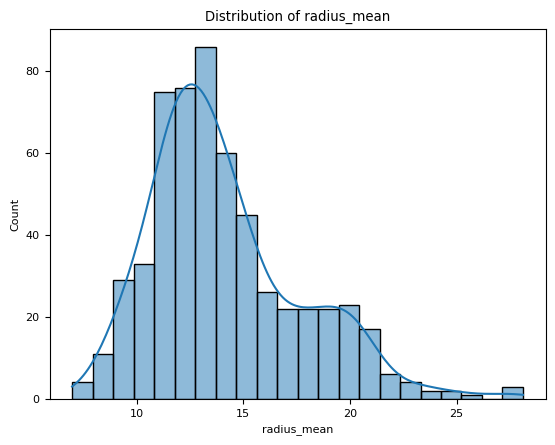

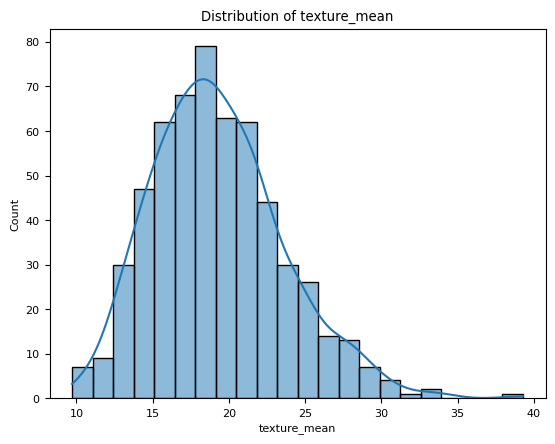

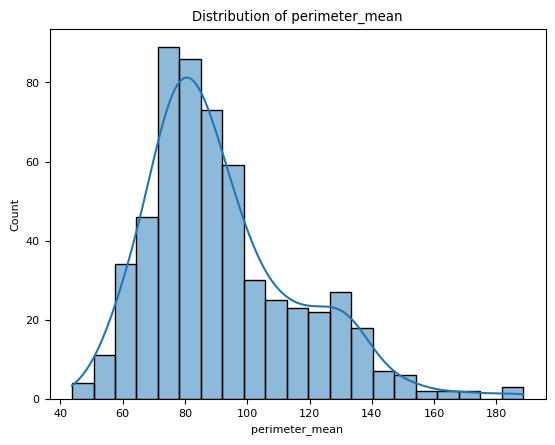

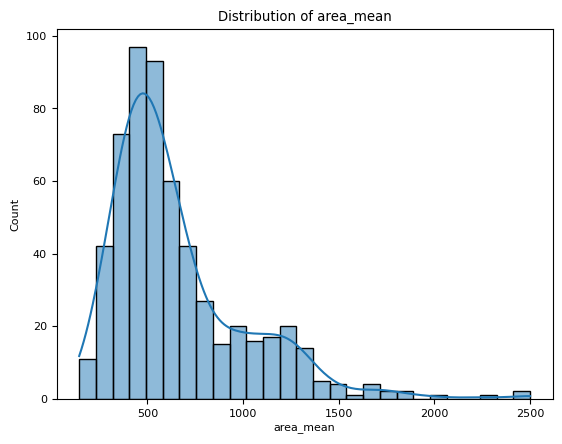

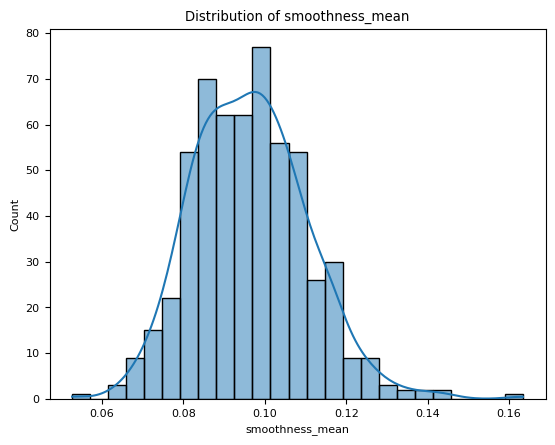

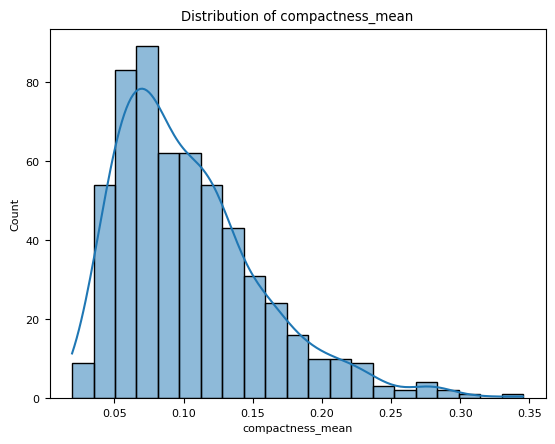

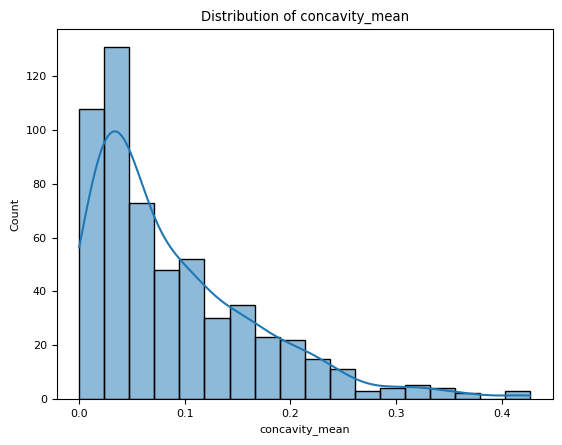

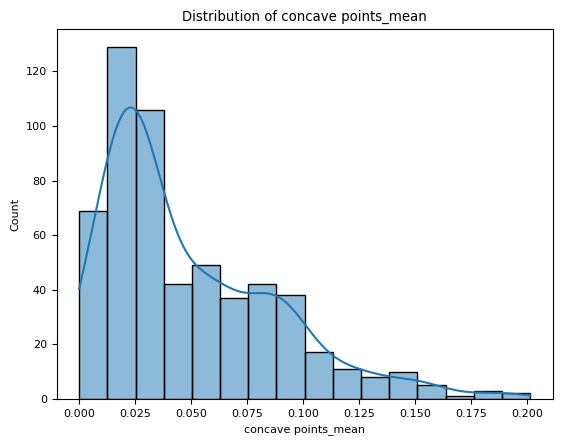

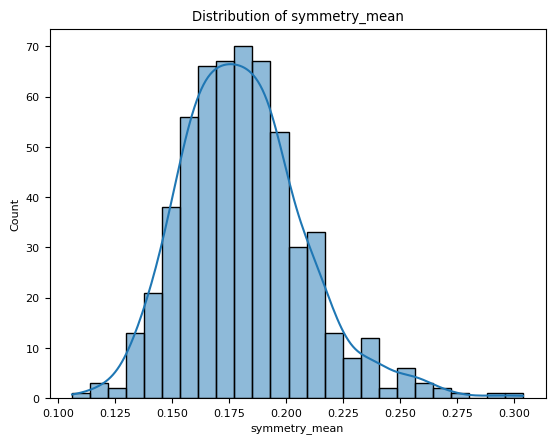

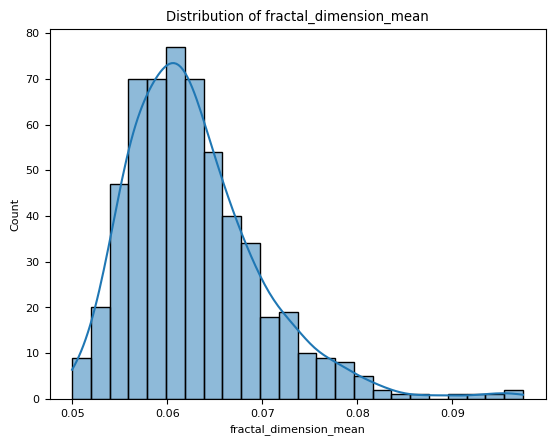

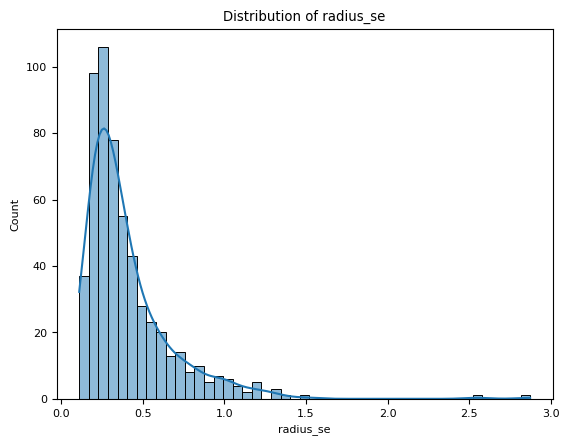

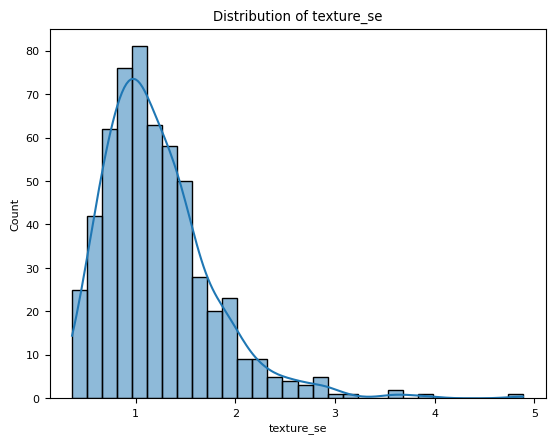

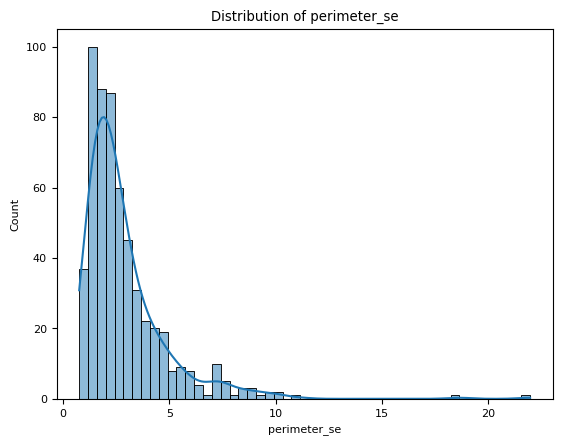

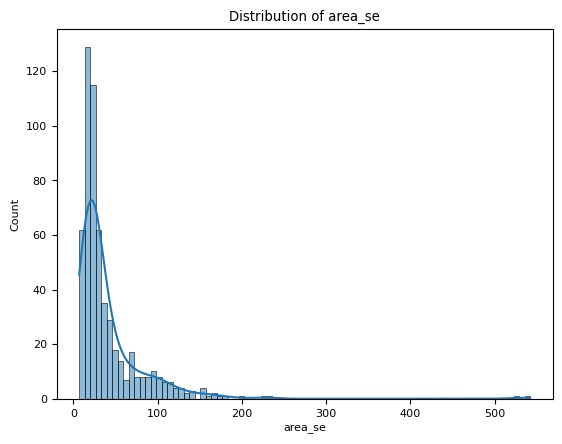

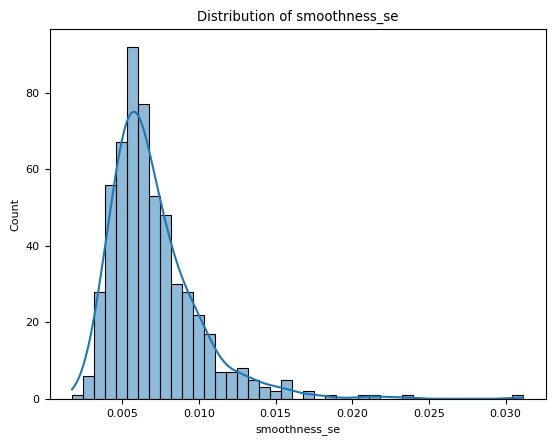

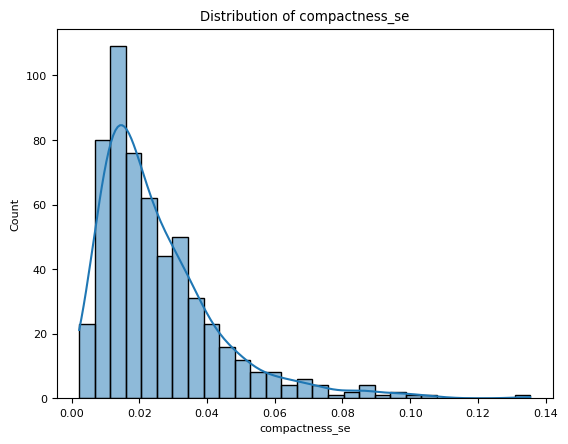

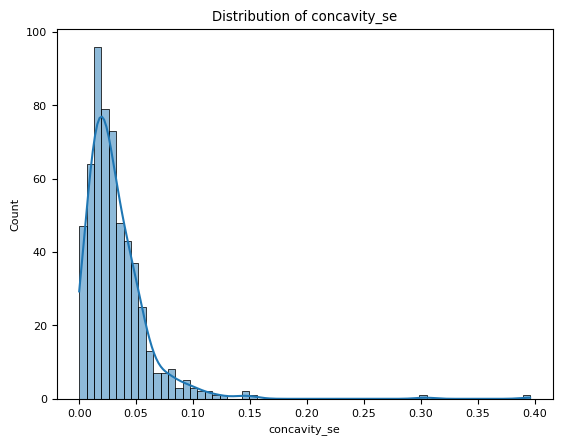

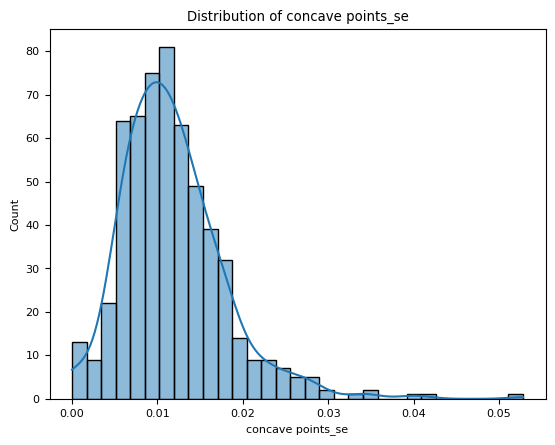

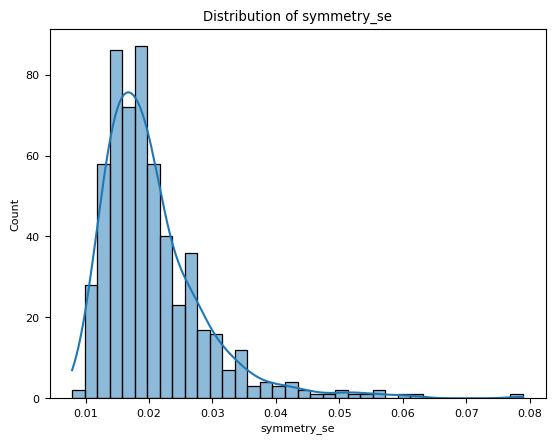

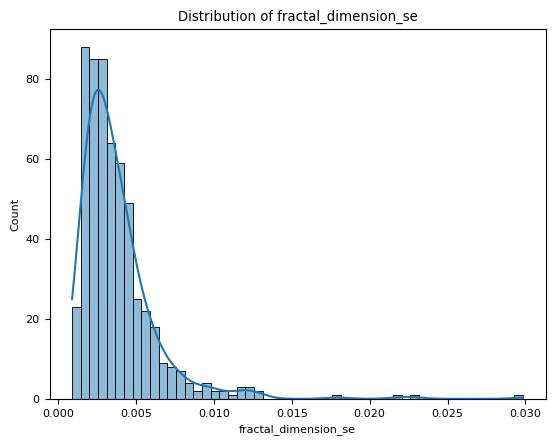

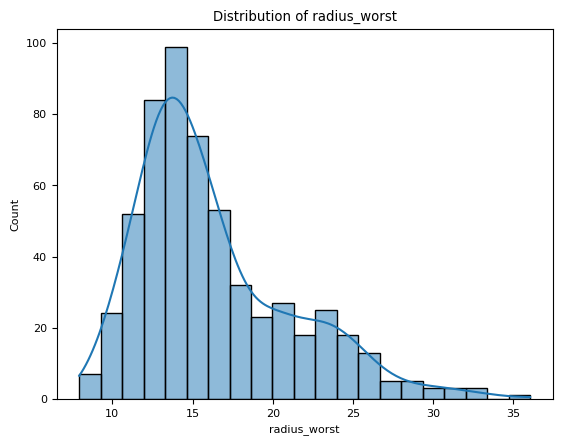

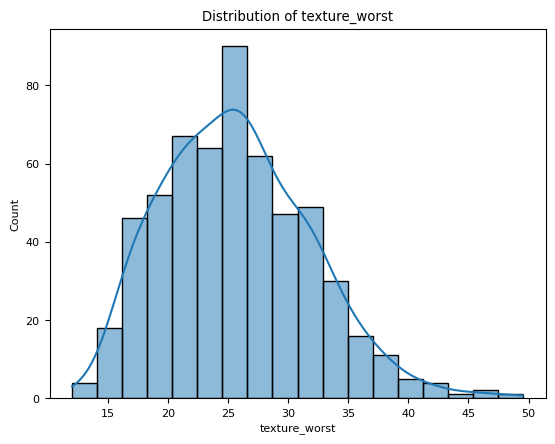

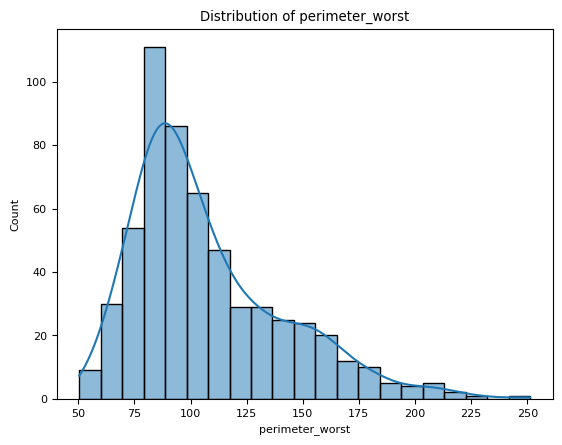

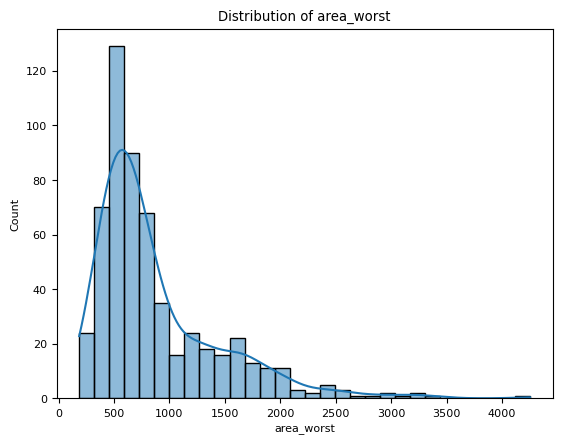

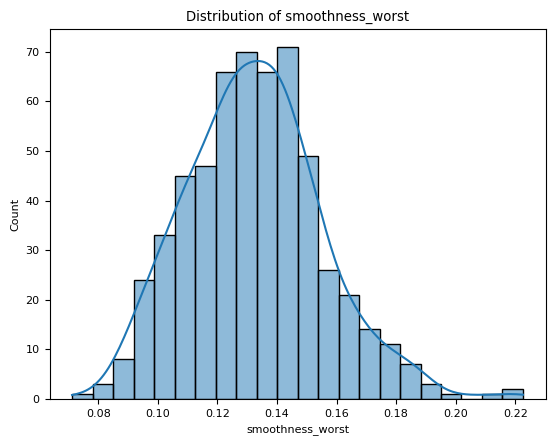

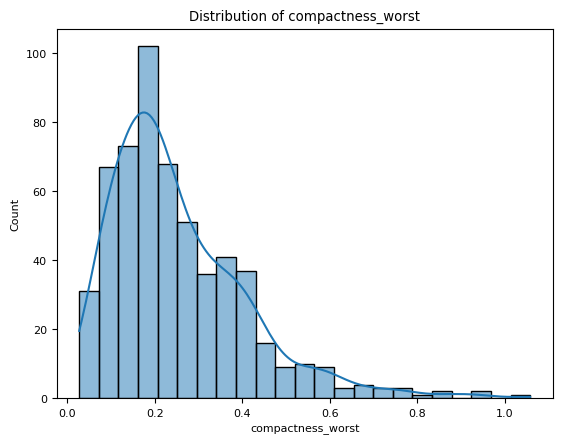

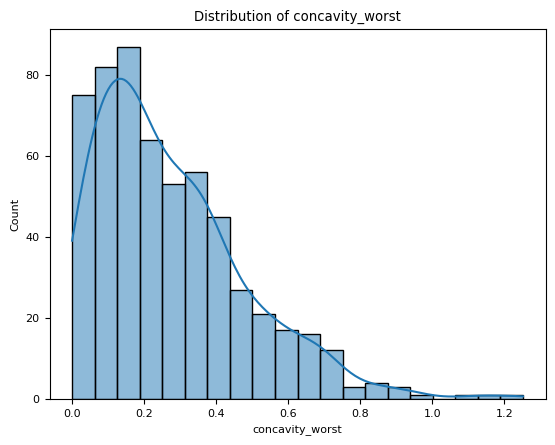

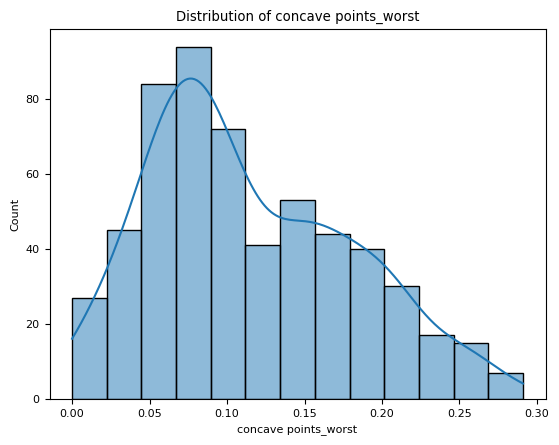

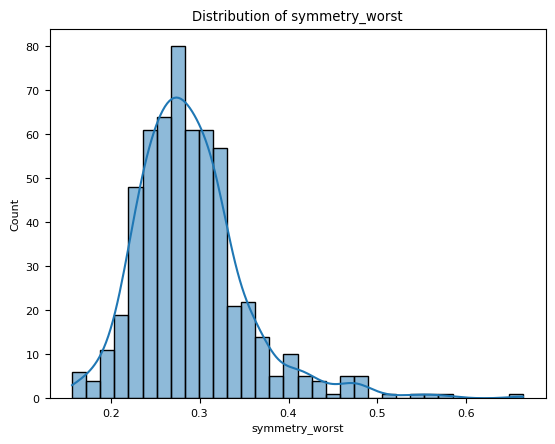

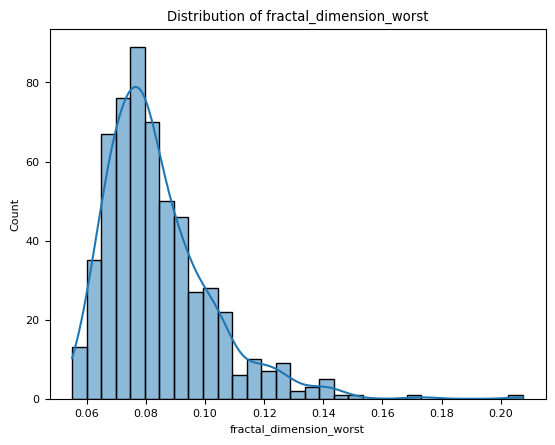

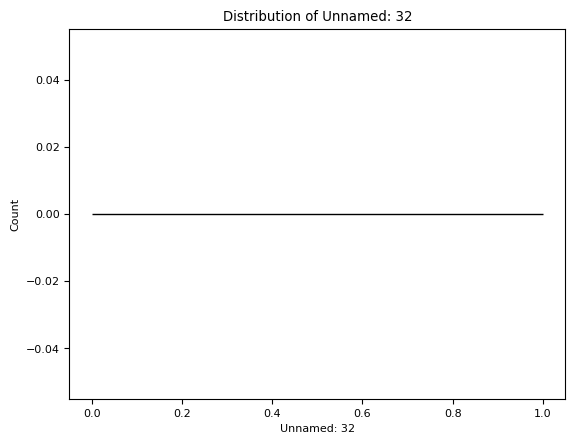

In [18]:
# Histogram and density plots
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

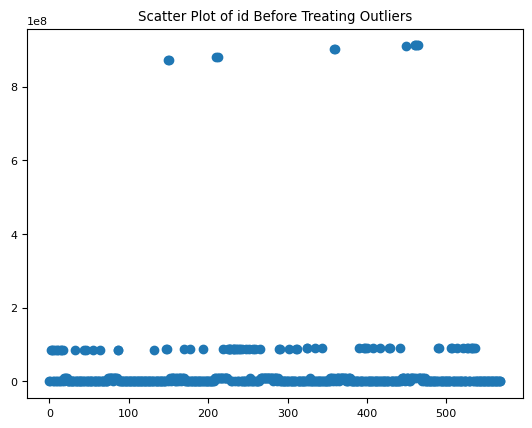

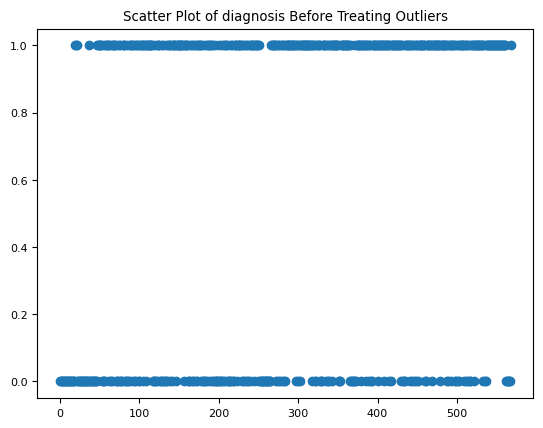

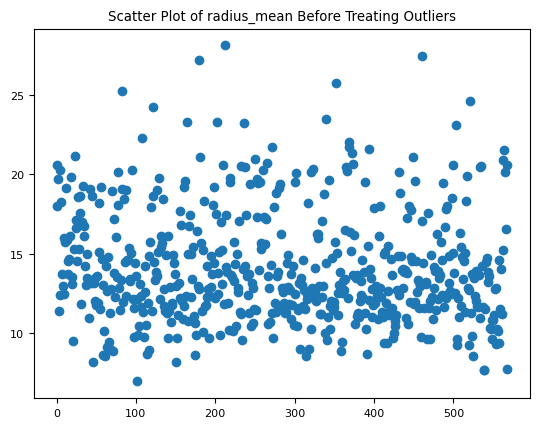

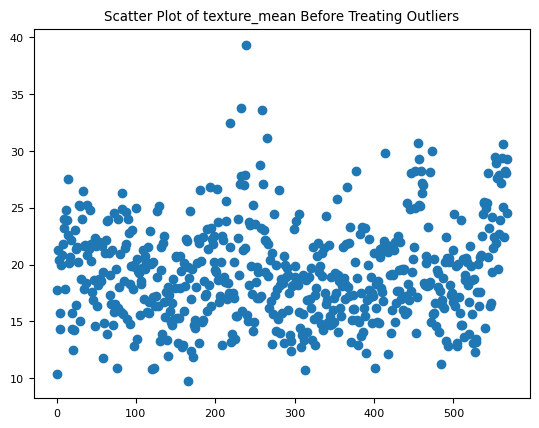

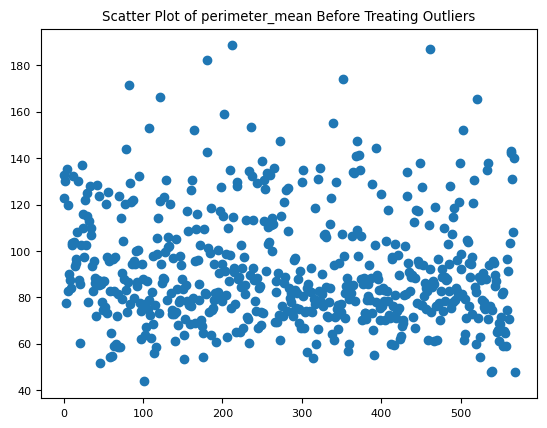

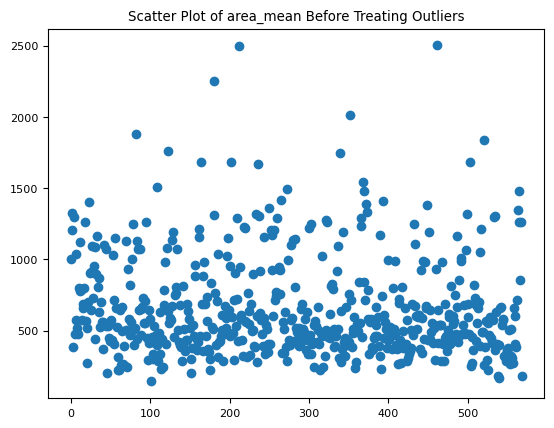

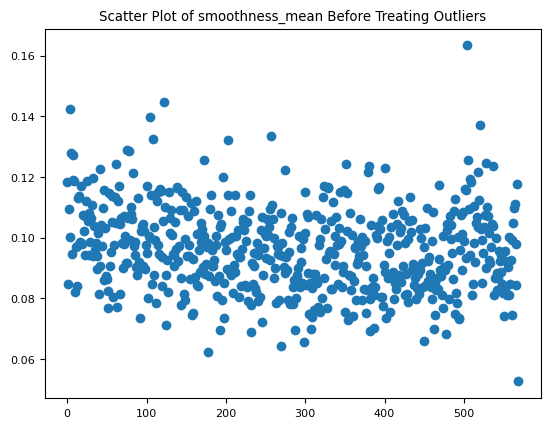

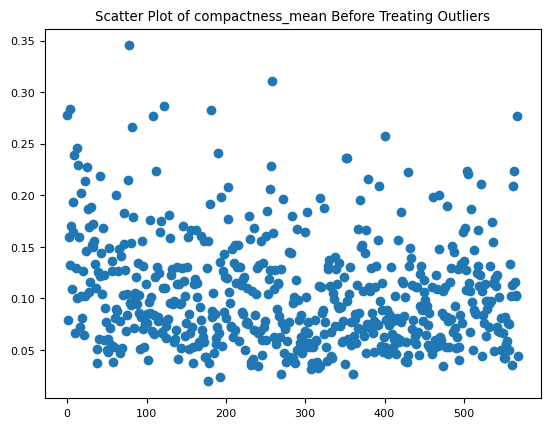

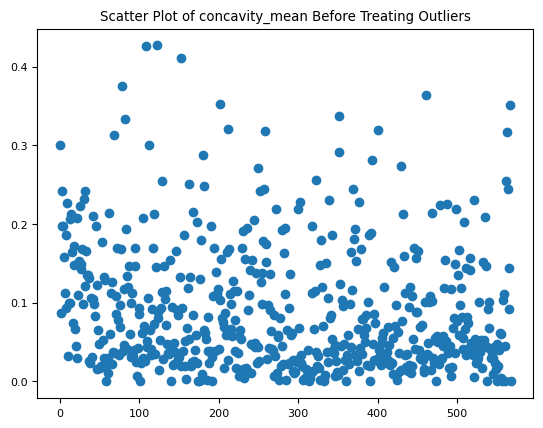

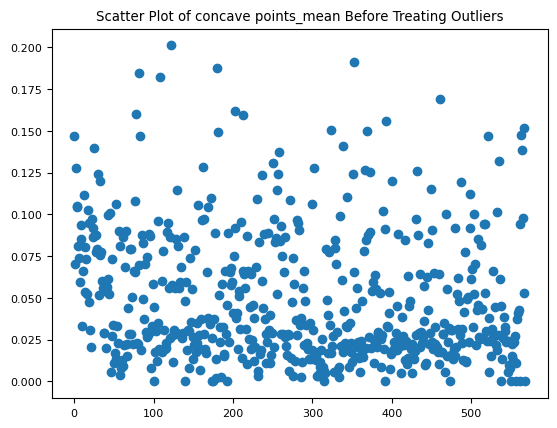

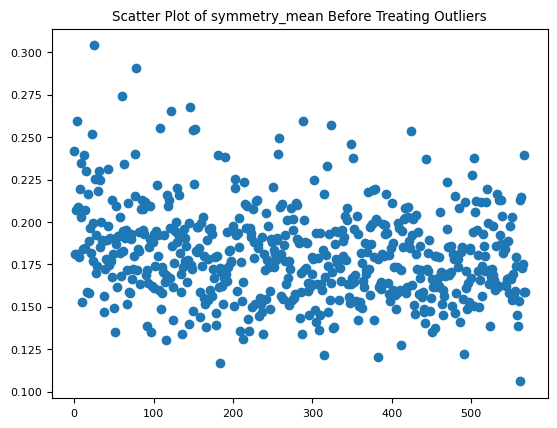

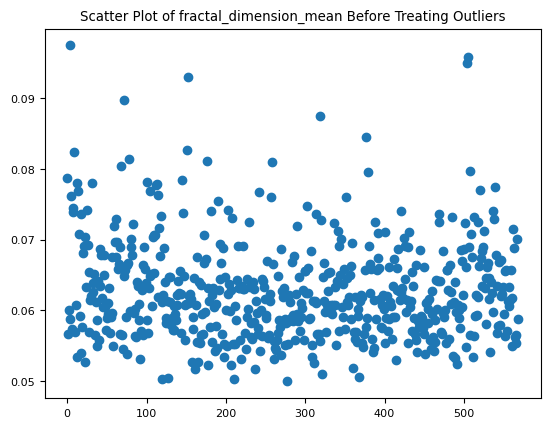

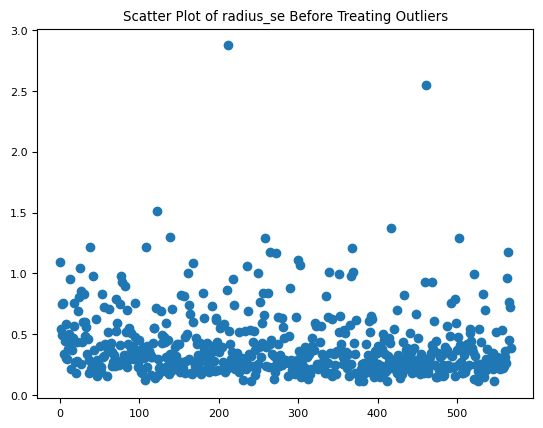

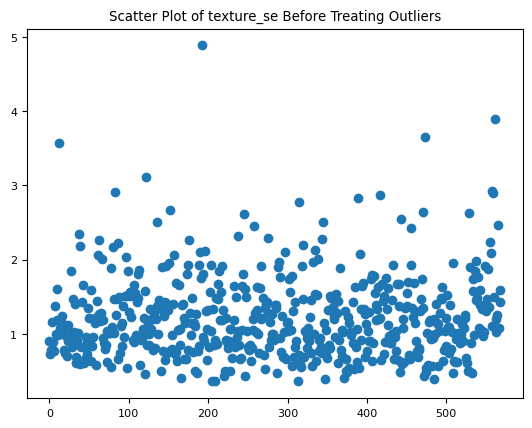

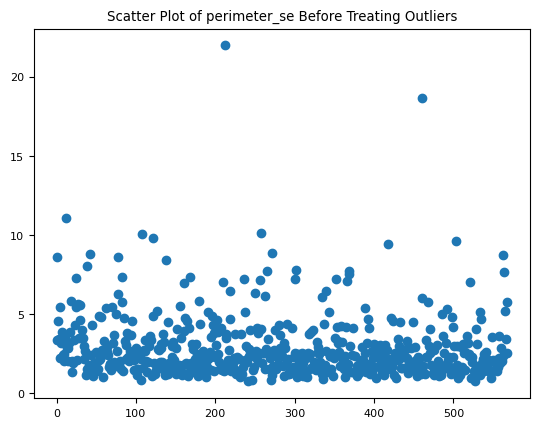

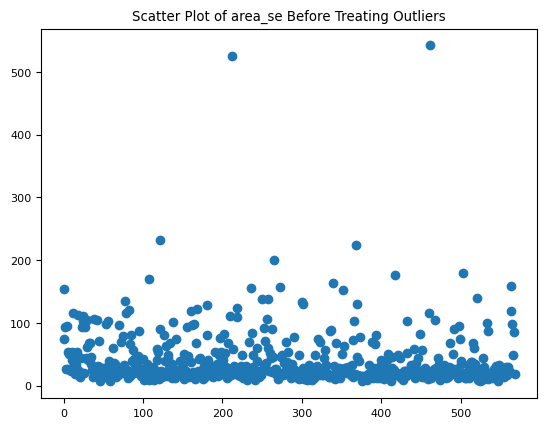

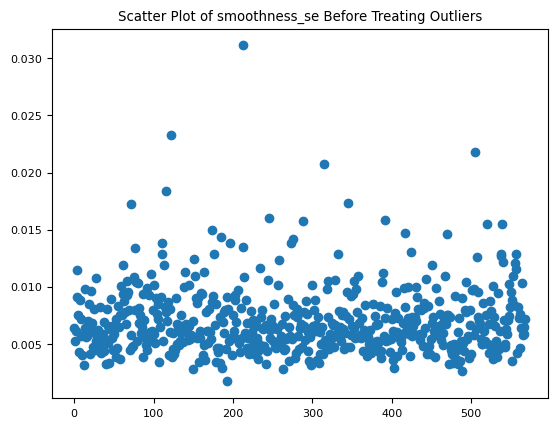

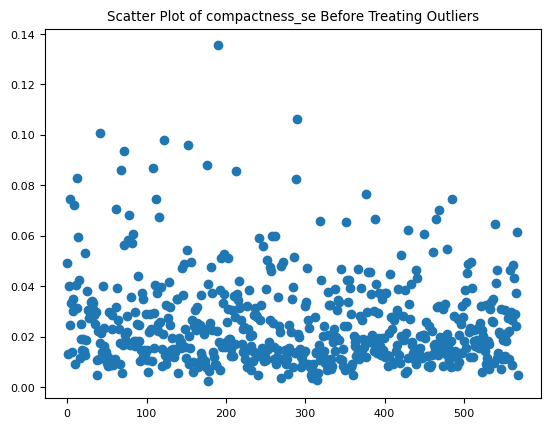

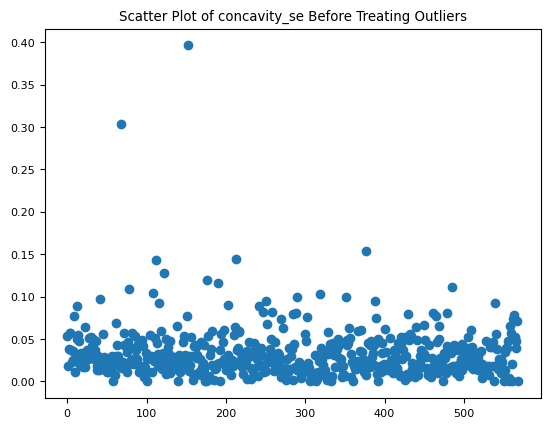

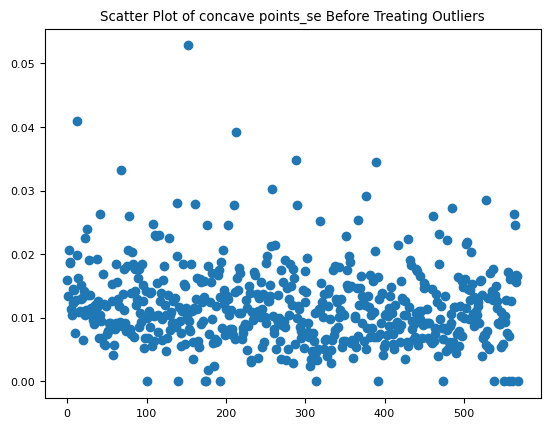

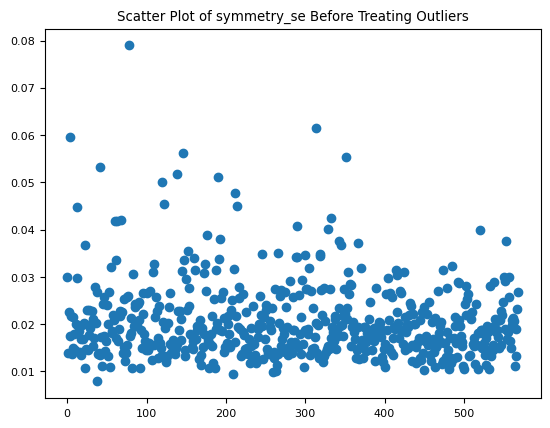

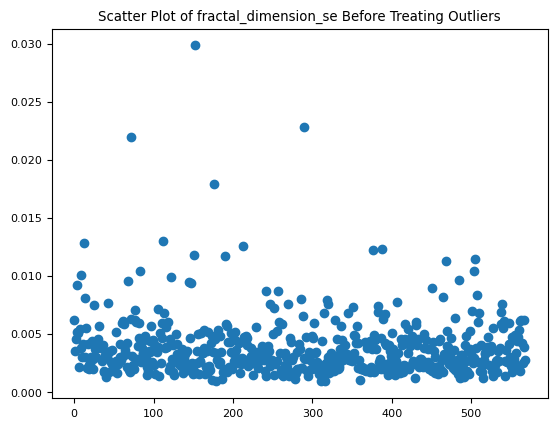

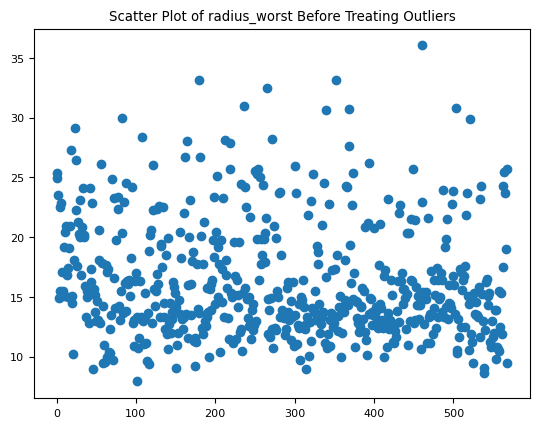

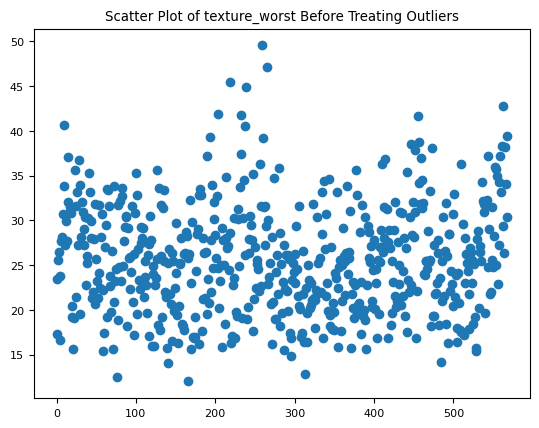

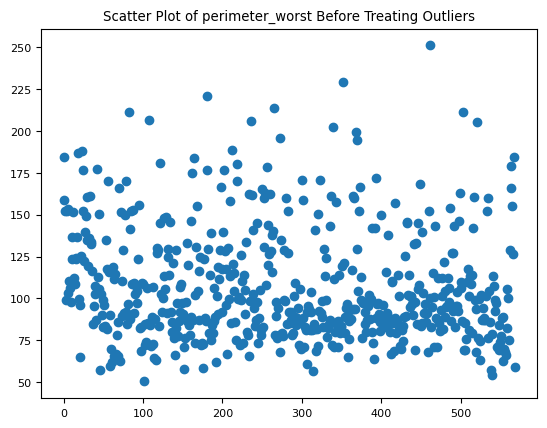

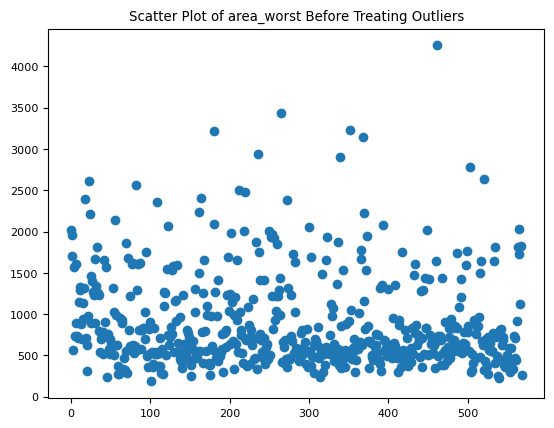

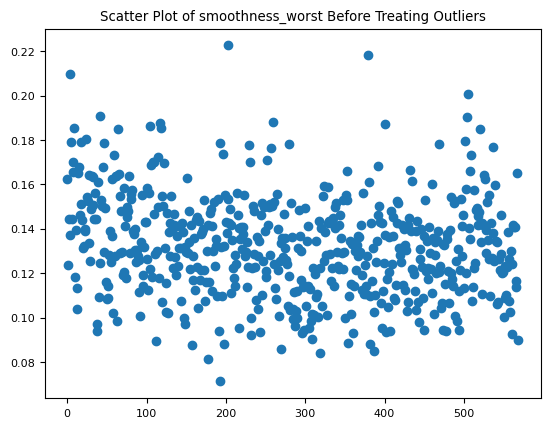

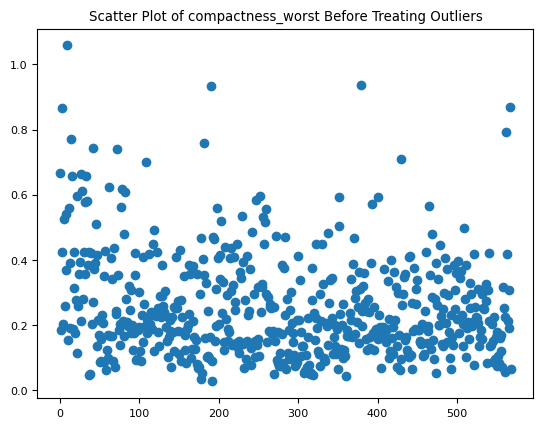

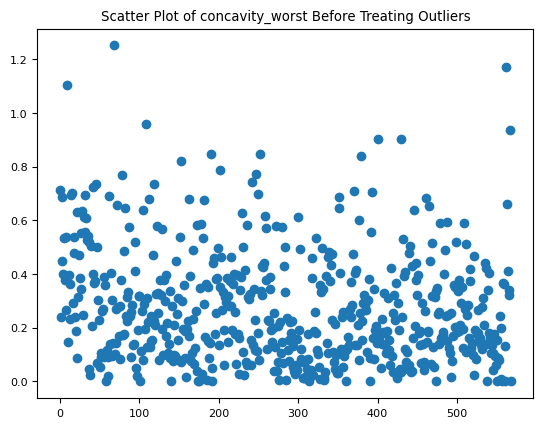

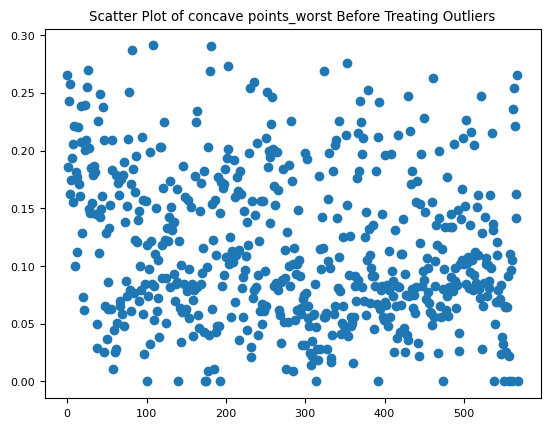

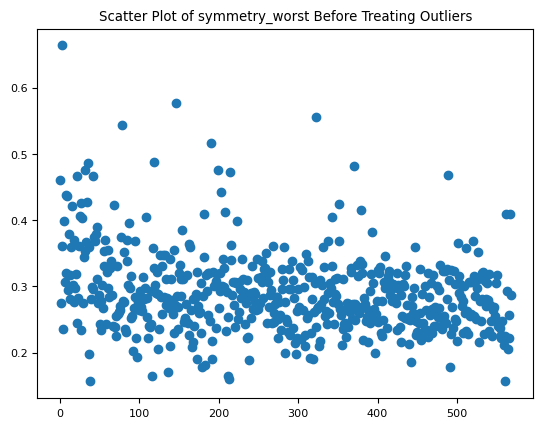

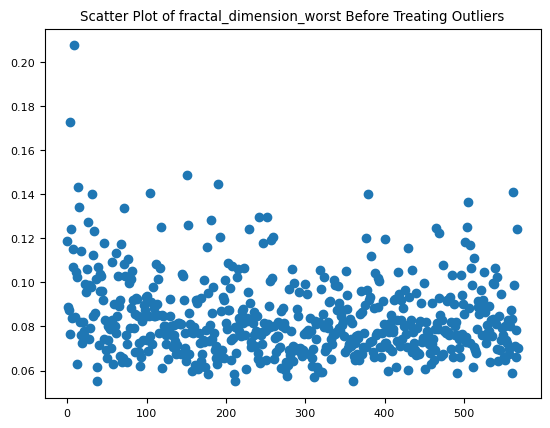

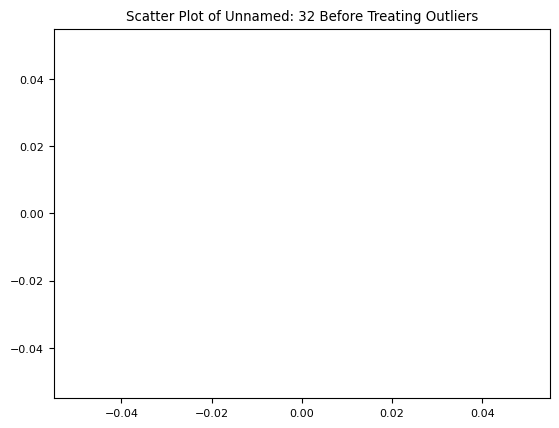

In [19]:

# Scatter plot for each column before treating outliers
for col in df.columns:
    plt.scatter(range(len(df)), df[col])
    plt.gca().set_facecolor('white')
    plt.title(f'Scatter Plot of {col} Before Treating Outliers')
    plt.show()

In [20]:
import pandas as pd



# Iterate over each column
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)



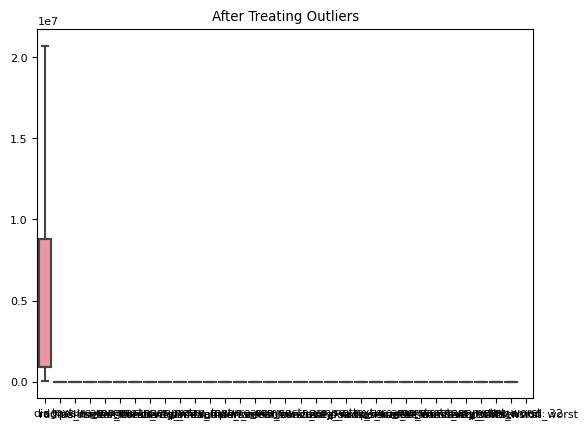

In [21]:
sns.boxplot(data=df)
plt.title('After Treating Outliers')
plt.show()

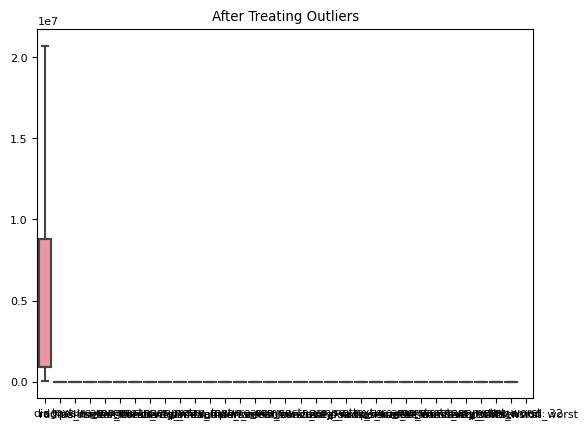

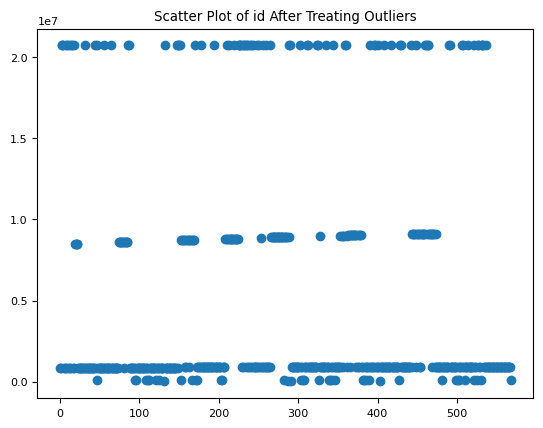

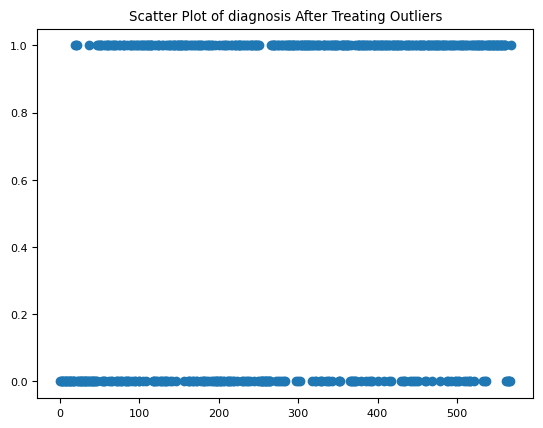

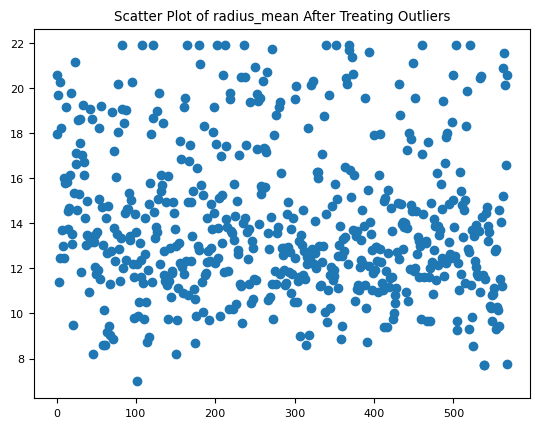

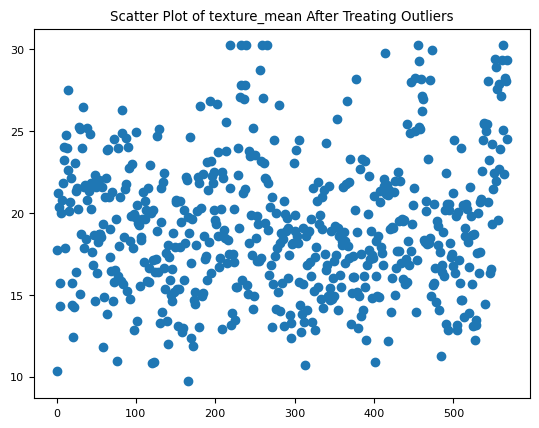

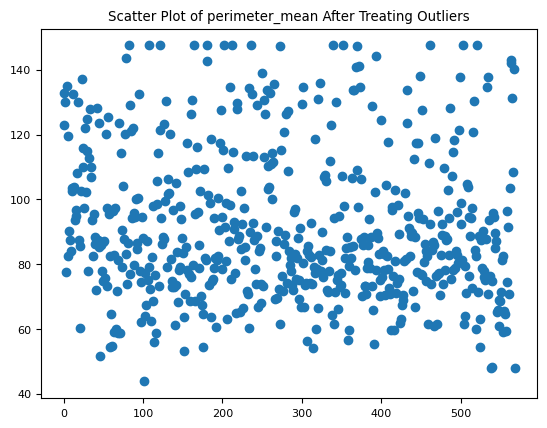

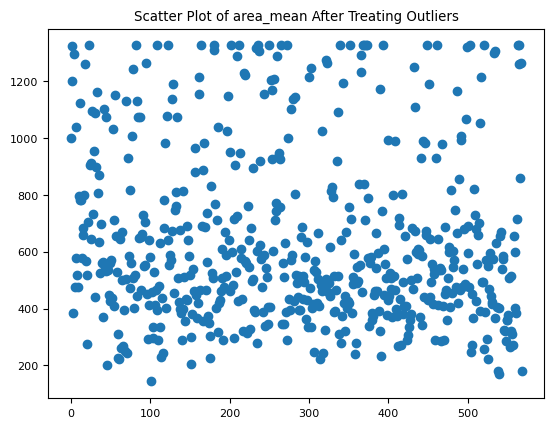

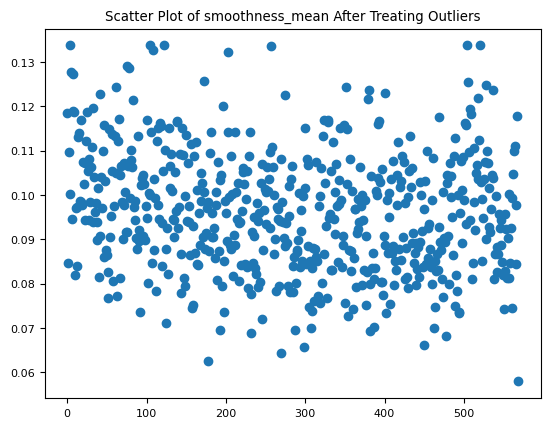

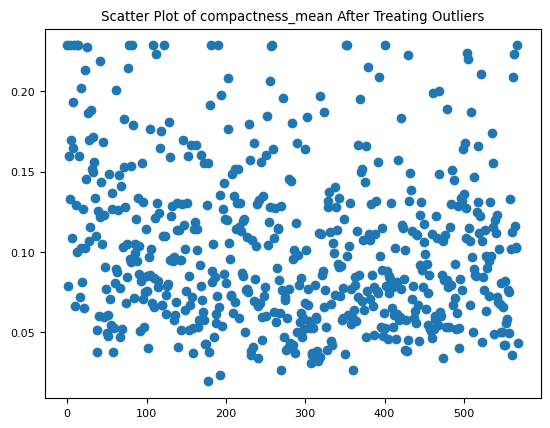

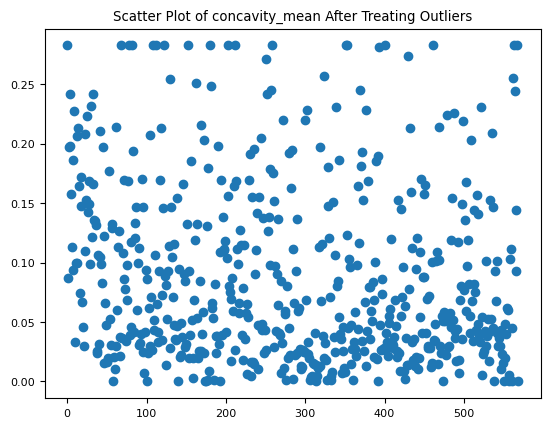

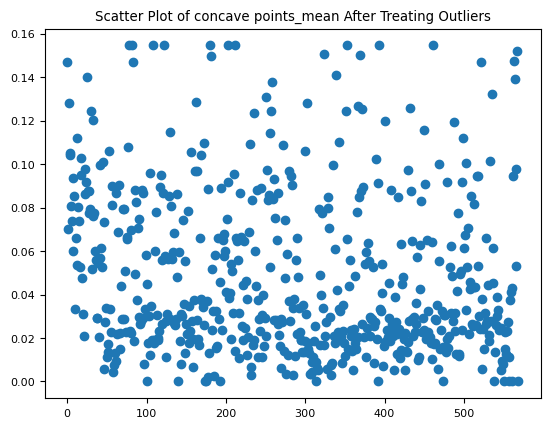

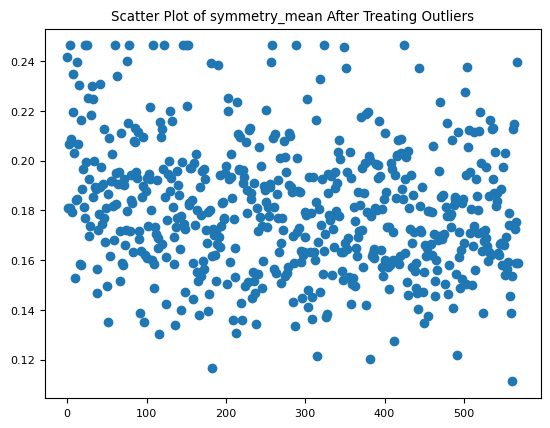

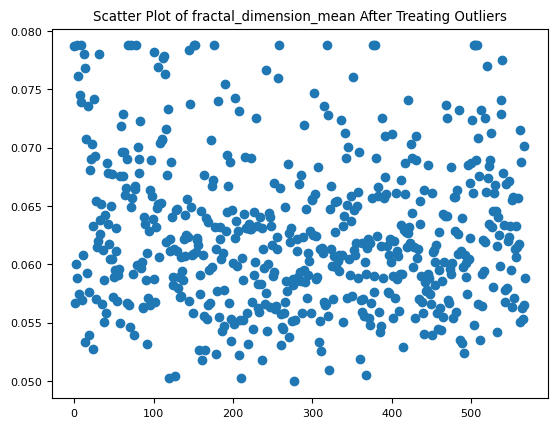

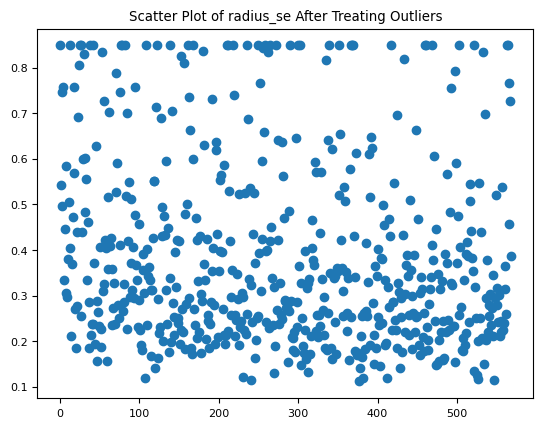

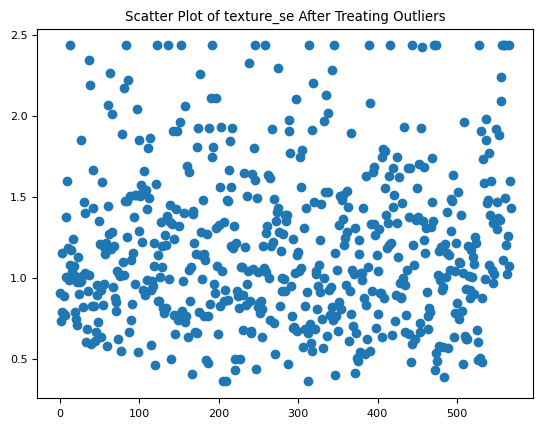

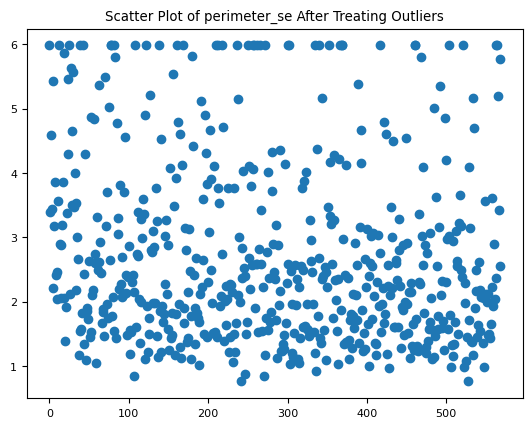

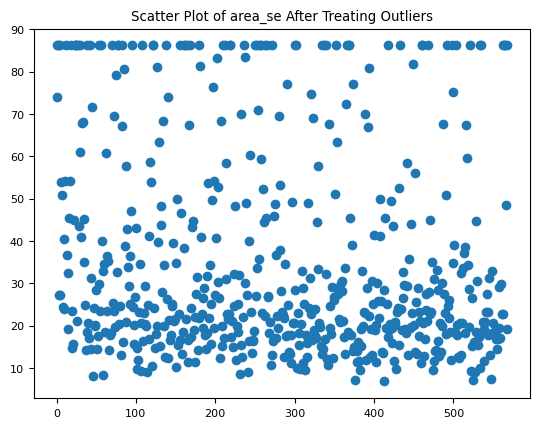

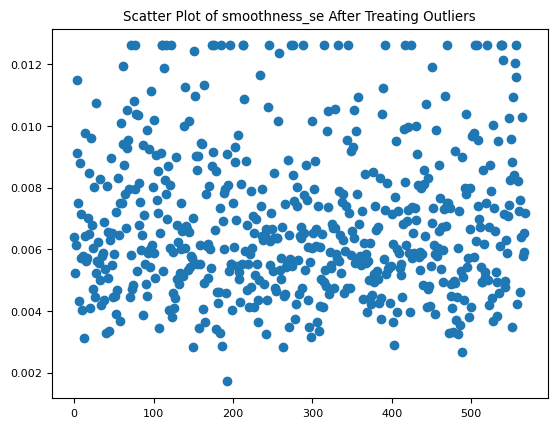

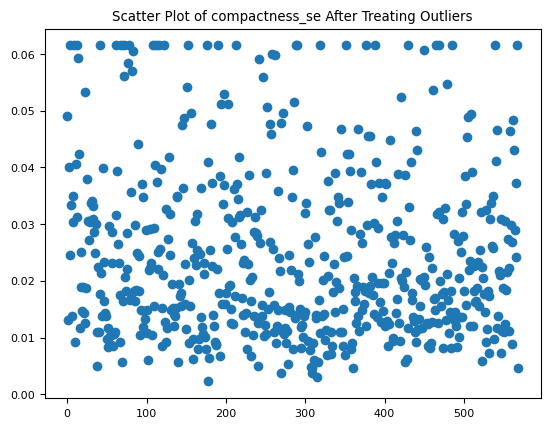

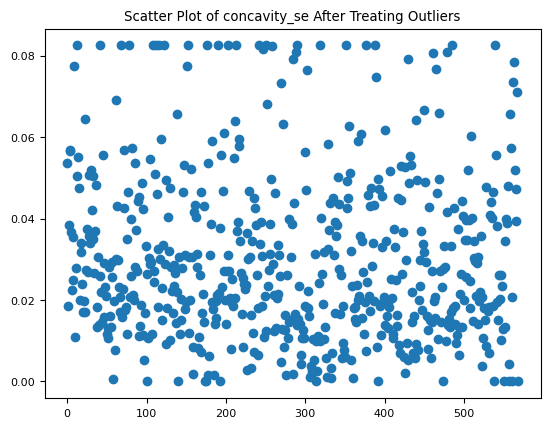

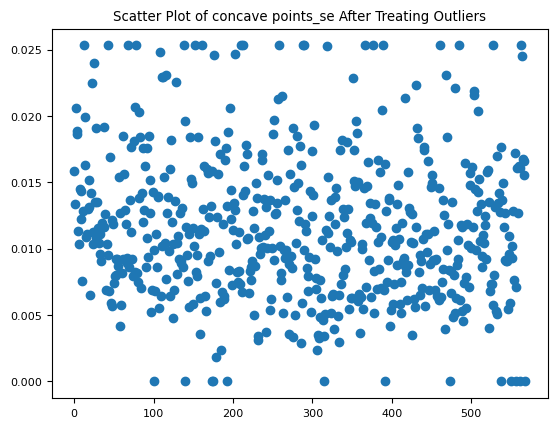

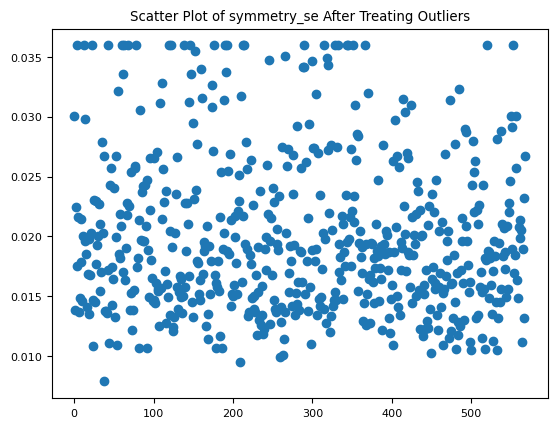

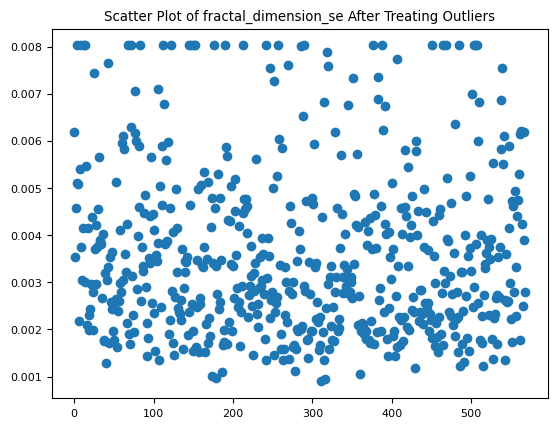

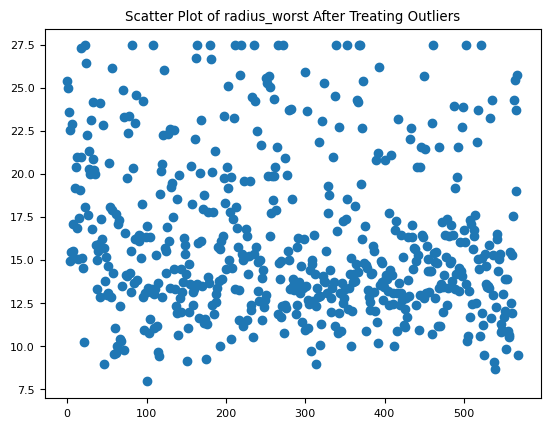

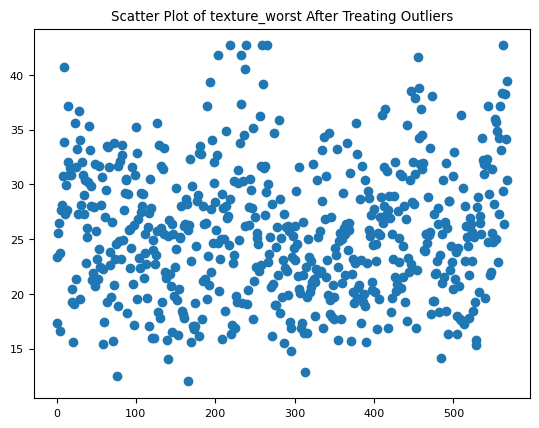

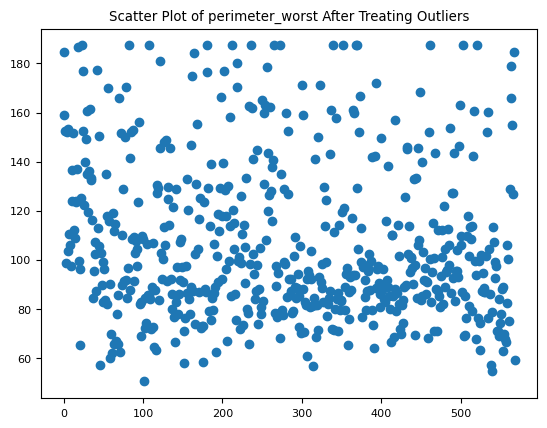

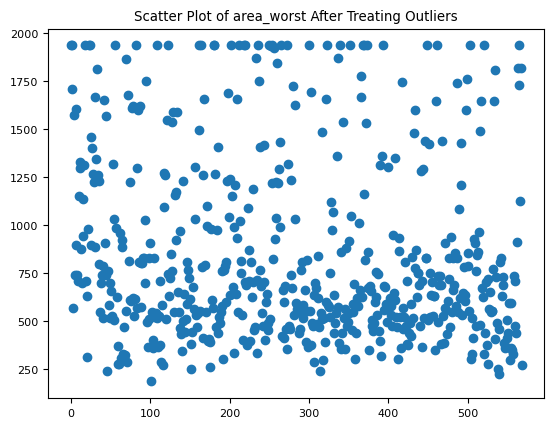

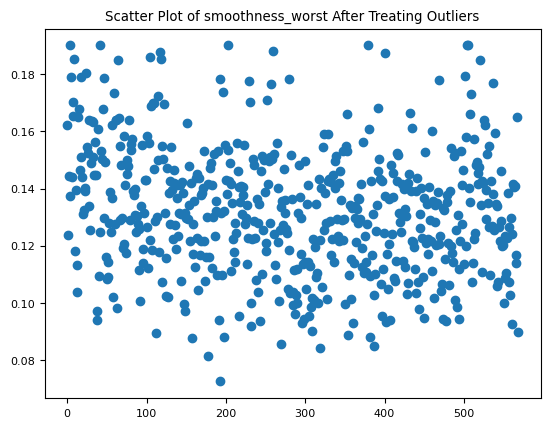

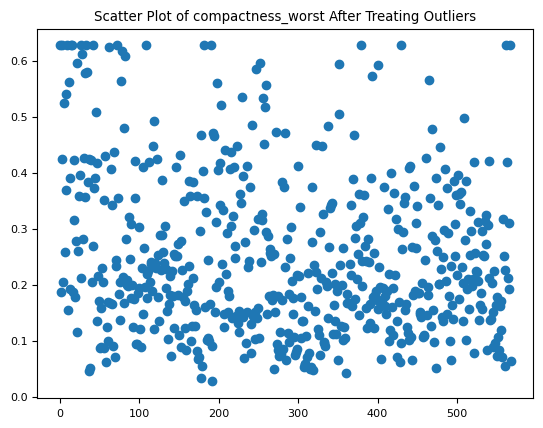

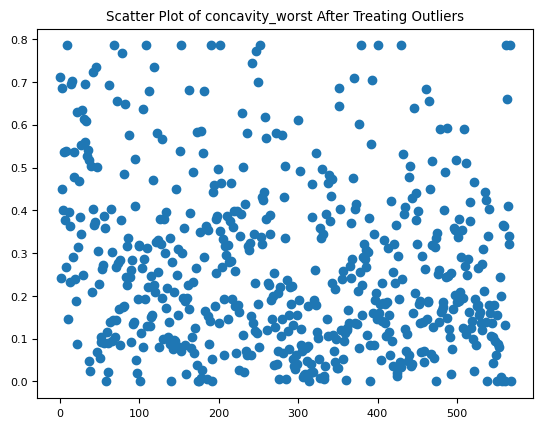

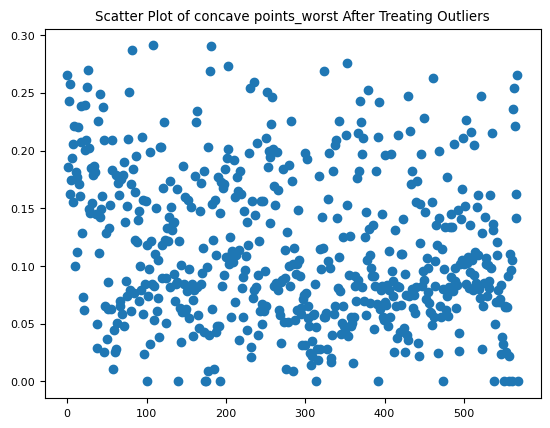

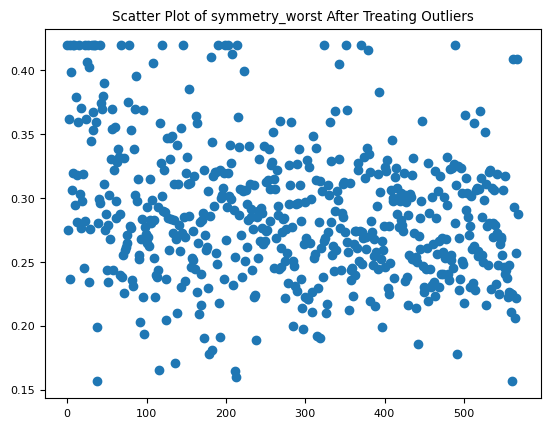

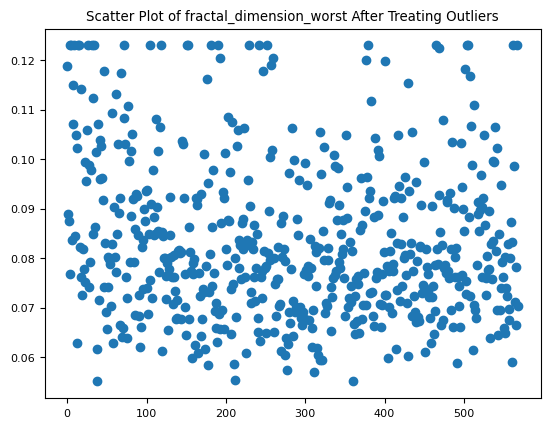

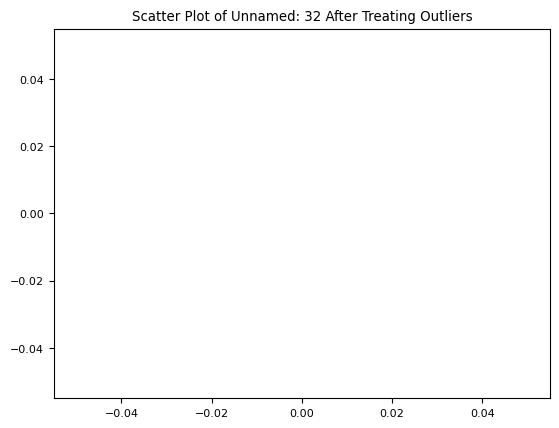

In [22]:
# Box plot after treating outliers
sns.boxplot(data=df)
plt.title('After Treating Outliers')
plt.show()

# Scatter plot for each column after treating outliers
for col in df.columns:
    plt.scatter(range(len(df)), df[col])
    plt.title(f'Scatter Plot of {col} After Treating Outliers')
    plt.show()

In [23]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [24]:
df = df.drop(columns=[df.columns[-1]])
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

C:\Users\Jairo\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jairo\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Jairo\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jair

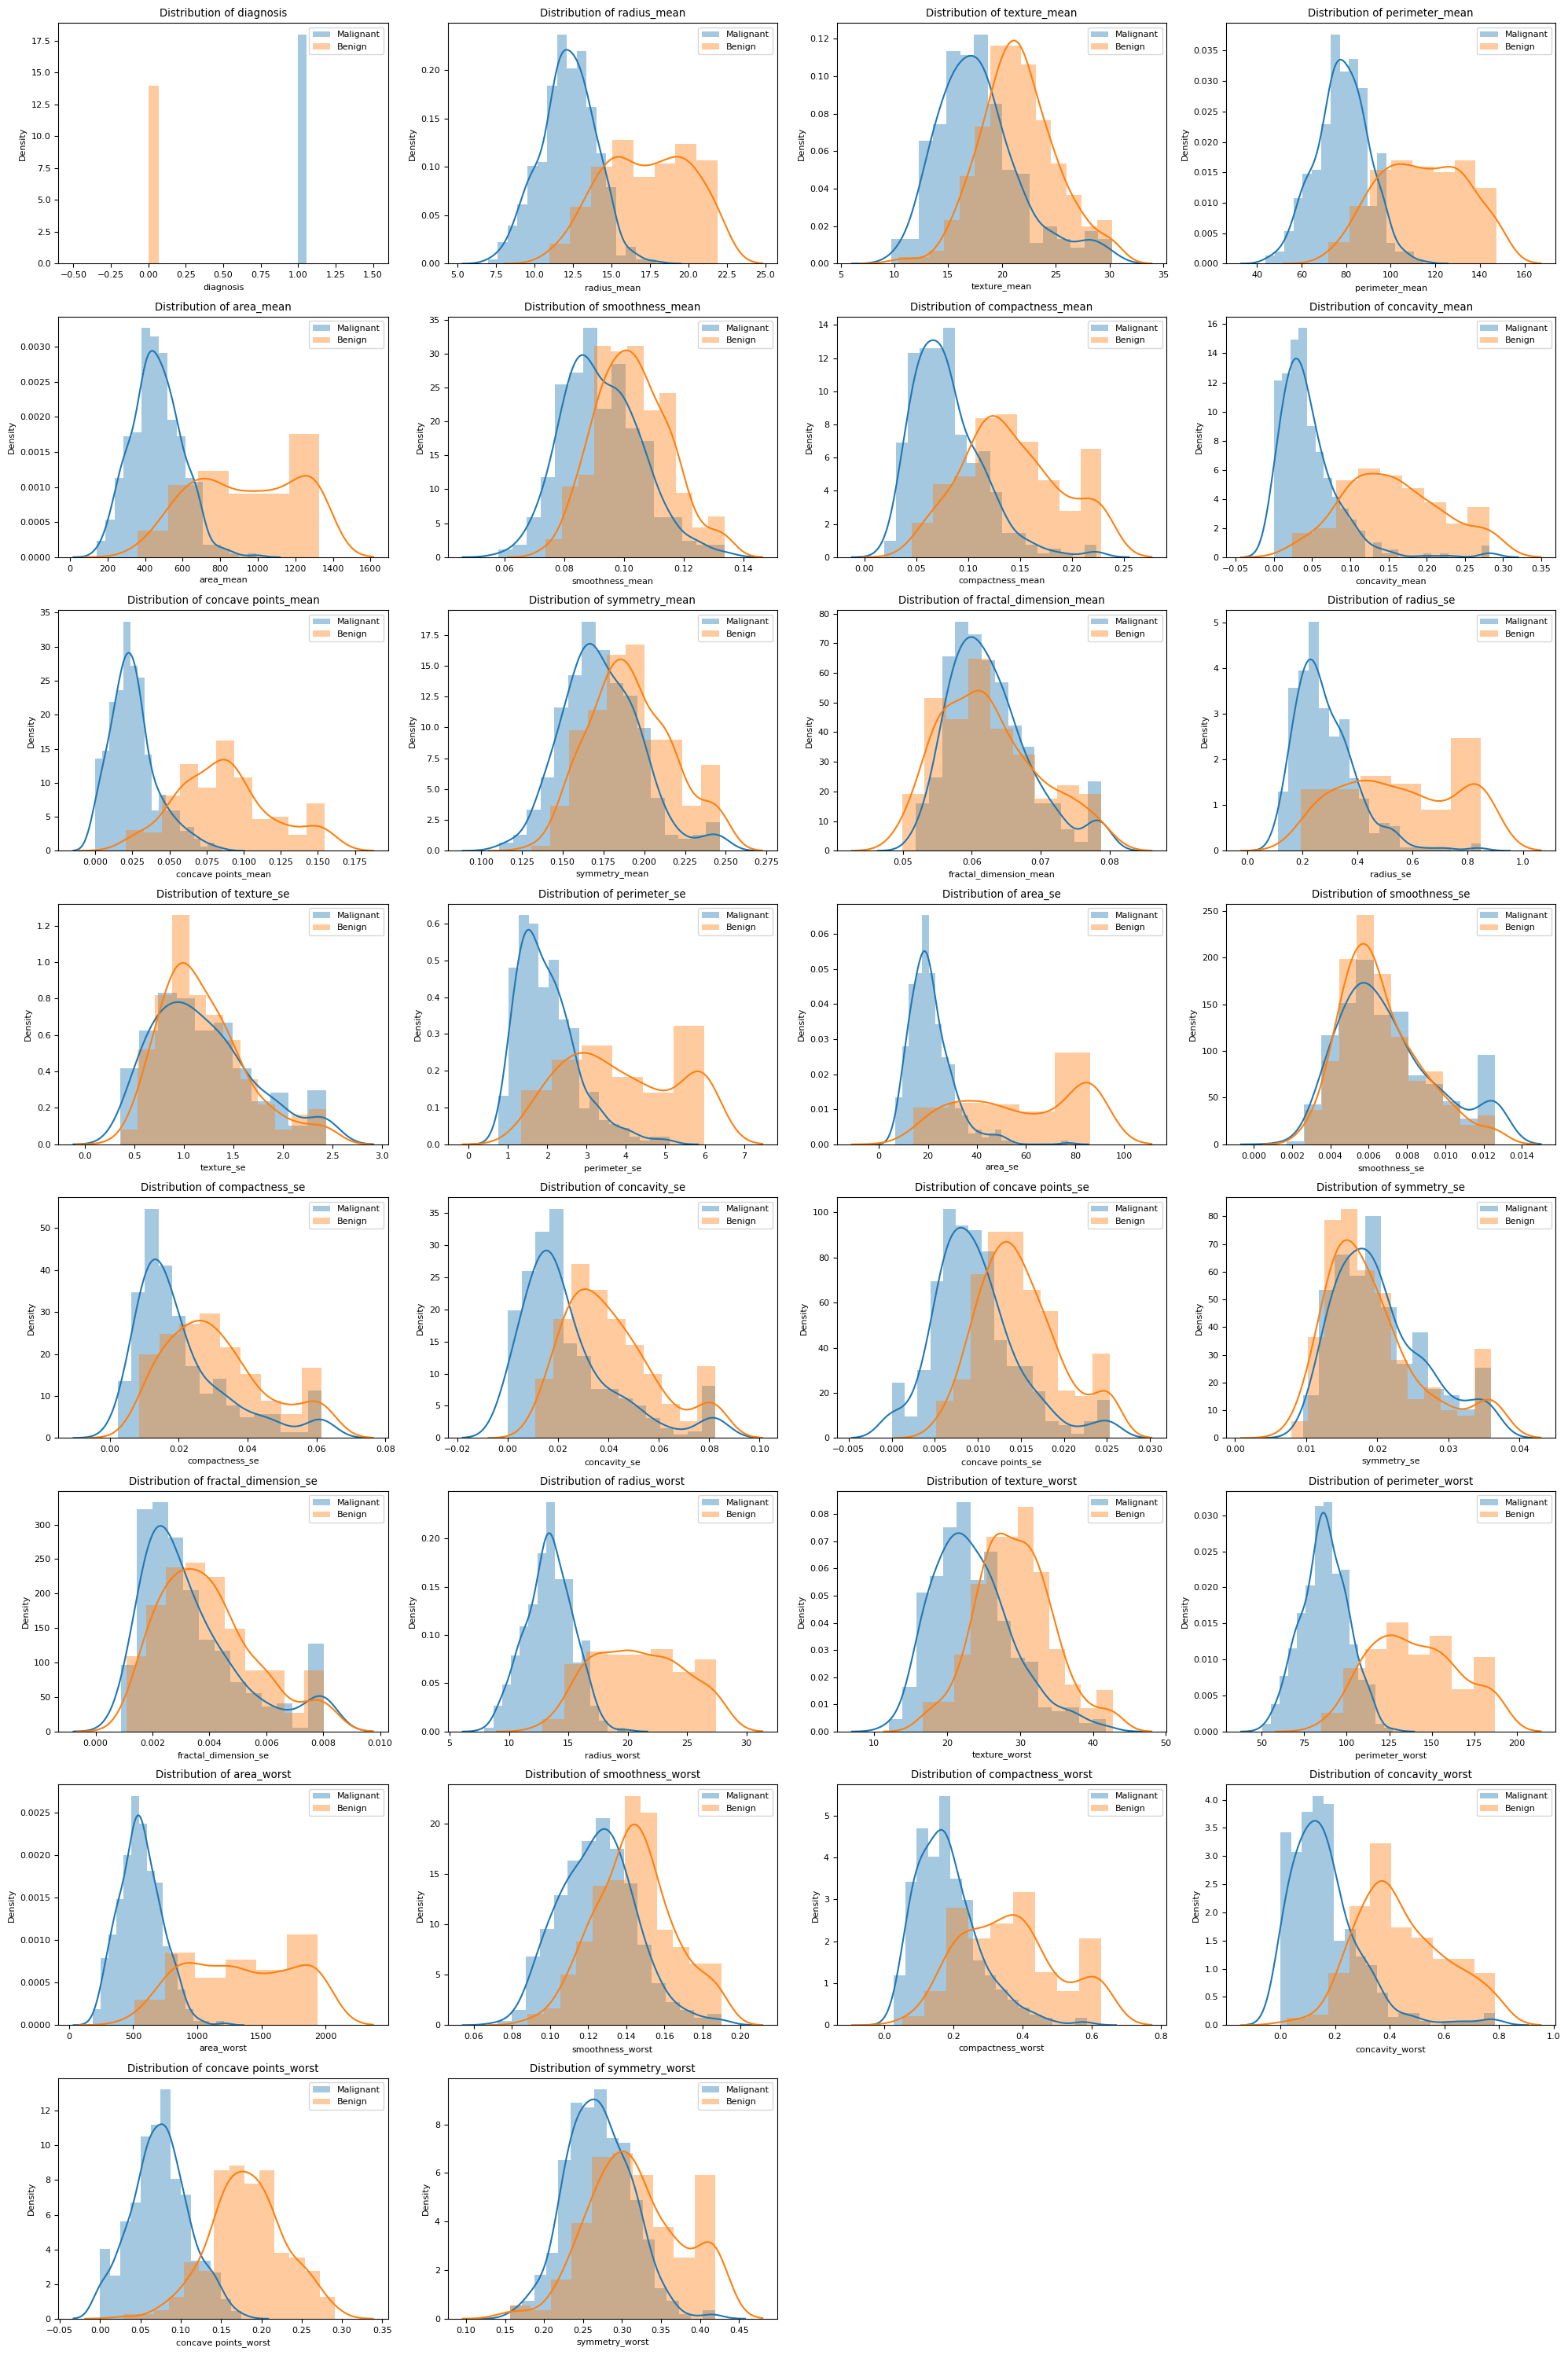

In [25]:


#plot the distributions for features in different classes 
M=df[df.diagnosis==1]
B=df[df.diagnosis==0]

plt.figure(figsize=(20,30))
for i in range(1,len(M.columns)-1):
    plt.subplot(8,4,i)
    sns.distplot(M[M.columns[i]],label='Malignant')
    sns.distplot(B[B.columns[i]],label="Benign")
    plt.title('Distribution of {}'.format(M.columns[i]))
    plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
inputs = df.drop(columns=['id','diagnosis'])
target = df.diagnosis

In [27]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Test set- Features: ", x_test.shape, "Target: ",y_test.shape)

Training set - Features:  (455, 30) Target:  (455,)
Test set- Features:  (114, 30) Target:  (114,)


In [28]:
#Data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [29]:
from sklearn.decomposition import PCA

# create a function to plot line graph to compare ratio - Explained Variance changes with different n component
def EV(n):
    pca = PCA(n_components=n, whiten=True)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    #plot
    plt.plot(range(1,int(n+1)), pca.explained_variance_ratio_.cumsum())
    plt.title('Explained Variance',fontsize=15)
    plt.xlabel('Number of Principle Components : {}'.format(n), fontsize=10)


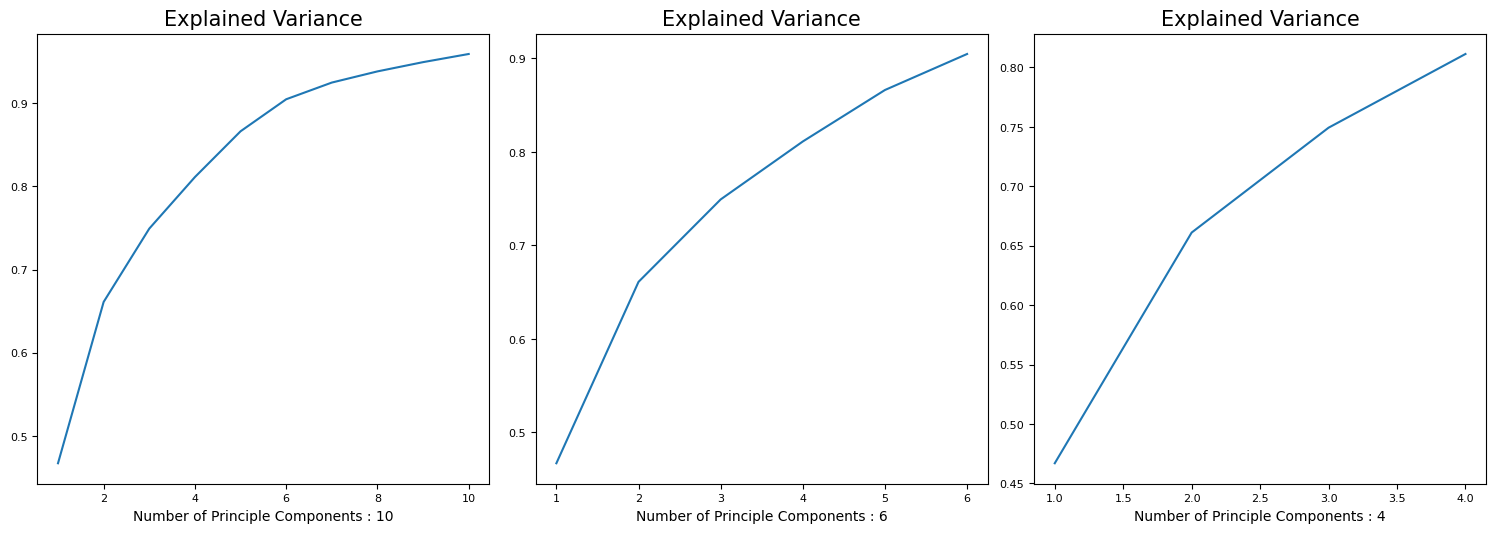

In [30]:
# use the function above and try use n_component from 15-19
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
EV(10)
plt.subplot(2,3,2)
EV(6)
plt.subplot(2,3,3)
EV(4)
plt.tight_layout()

In [31]:
# PCA transformation and reduce the dimension from 4096 to 50
#pca = PCA(n_components=3, whiten=True)
#X_train = pca.fit_transform(x_train)
#X_test = pca.transform(x_test)

In [32]:
#GridSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# given prameters different values
# given prameters different values
random_grid={
             'n_estimators':list(range(220,240)),
             'max_depth':list(range(1,30,2)),
             'max_features':list(range(1,19)),
             'min_samples_leaf':list(range(1,19)),
             'min_samples_split':list(range(1,19))                   
                            
                                
            }

In [33]:
import numpy as np
# random forest model
rfc=RandomForestClassifier(random_state=666)
# randommized searchCV
RS=RandomizedSearchCV(rfc,random_grid,cv=10, error_score=np.nan)

In [34]:
# fit the train data
RS.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
RS.best_params_,RS.best_score_

({'n_estimators': 226,
  'min_samples_split': 13,
  'min_samples_leaf': 4,
  'max_features': 3,
  'max_depth': 13},
 0.9428502415458938)

In [ ]:
# Random Forest model with best parameters
rfc=RandomForestClassifier(
    n_estimators=RS.best_params_["n_estimators"],
 min_samples_split= RS.best_params_["min_samples_split"],
 min_samples_leaf= RS.best_params_["min_samples_leaf"],
 max_features= RS.best_params_["max_features"],
 max_depth= RS.best_params_["max_depth"],
 n_jobs=-1,
 random_state=42)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=13, max_features=3, min_samples_leaf=4,
                       min_samples_split=13, n_estimators=226, n_jobs=-1,
                       random_state=42)

In [ ]:
# let us take a look at the results
print('Accuracy score of train data :{}'.format(rfc.score(X_train,y_train)))
print('Accuracy score of test data:{}'.format(rfc.score(X_test,y_test)))
# obtian train data f1_Score
pre_train=rfc.predict(X_train)
print('Train data f1_Score:{}'.format(f1_score(y_train, pre_train,average='weighted')))
# Obtain Test data f1_Score
y_pred=rfc.predict(X_test)
print('Test data f1_Score:{}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy score of train data :0.9758241758241758
Accuracy score of test data:0.9298245614035088
Train data f1_Score:0.9758082398064819
Test data f1_Score:0.9298245614035088


In [ ]:
# function of  plot_confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[43  4]
 [ 4 63]]


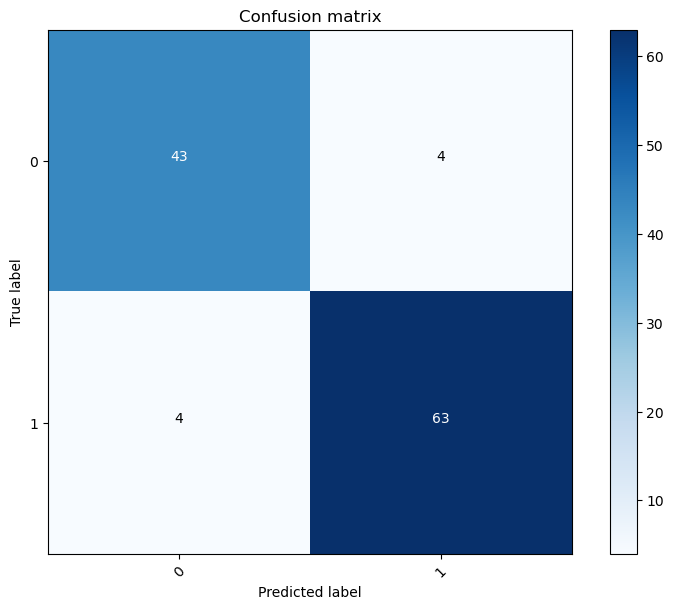

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
classes = ['0','1']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

**K-Nearest Neighbors


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV



random_gridknn={'n_neighbors':[1,100,200]}
knn= KNeighborsClassifier()
gs_knn=GridSearchCV(knn,random_gridknn,cv=10)
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 100, 200]})

In [ ]:
gs_knn.best_params_,gs_knn.best_score_

({'n_neighbors': 1}, 0.9119323671497584)

In [ ]:
knn_final= KNeighborsClassifier(n_neighbors=1)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_train_pre=knn_final.predict(X_train)

print('accuracy_score of train data :{}'.format (accuracy_score(y_train,y_train_pre)))
print('f1_score of train data:{}'.format(f1_score(y_train,y_train_pre,average='macro'))) 
# # make class predictions for the testing set

y_pred_class = knn_final.predict(X_test)
print('accuracy_score of test data :{}'.format (accuracy_score(y_test, y_pred_class)))
print('f1_score of test data:{}'.format(f1_score(y_test, y_pred_class,average='macro')) )

accuracy_score of train data :1.0
f1_score of train data:1.0
accuracy_score of test data :0.9298245614035088
f1_score of test data:0.9265700483091788


Logistic Regression Model

In [ ]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


def Logistic_Regression(x_train, y_train,x_test, y_test):
    log_re = LogisticRegression()#max_iter=1000
    log_re.fit(x_train, y_train)
    #calculate scores for test data and train data 
    test_data_score = log_re.score(x_test, y_test)
    train_data_score = log_re.score(x_train, y_train)
    print("Train data score:{}".format(train_data_score ))
    print("Test data score:{}".format(test_data_score ))
    # predict values for test data and train data
    log_y_test_pre=log_re.predict(x_test)
    log_y_train_pre=log_re.predict(x_train)
    # calculate f1 scores for test data and train data 
    log_f1_score_test=f1_score(y_test,log_y_test_pre)
    log_f1_score_train=f1_score(y_train,log_y_train_pre)

    print("Train data f1 score:{}".format(log_f1_score_train))
    print("Test data f1 score:{}".format(log_f1_score_test ))
    return log_y_train_pre,log_y_test_pre

In [ ]:
from sklearn.utils import resample
import pandas as pd

# concatenate our training data back together
training  = pd.DataFrame(x_train)
training[training.columns]=x_train
training['target']=list(y_train)
# separate minority and majority classes
MM= training[training.target==1]# minority 
BB= training[training.target==0]# majority

MM_upsampled = resample(MM,
                          replace=True, # sample with replacement
                          n_samples=len(BB), # match number in majority class
                          random_state=23) # reproducible results



upsampled= pd.concat([BB,MM_upsampled])
upsampled.target.value_counts()

y_train = upsampled.target
x_train = upsampled.drop('target', axis=1)

log_y_train_prec,log_y_test_prec=Logistic_Regression(x_train, y_train,x_test, y_test)

Train data score:0.9939393939393939
Test data score:0.9385964912280702
Train data f1 score:0.9939759036144578
Test data f1 score:0.9473684210526316


C:\Users\Jairo\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


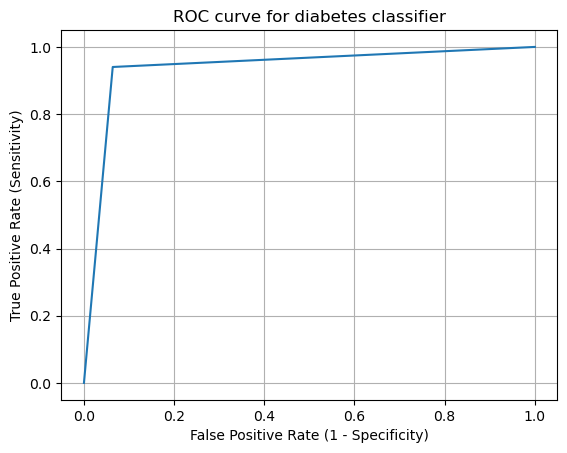

In [ ]:
from sklearn import metrics

fp_log, tp_log, thresholds_log = metrics.roc_curve(y_test, log_y_test_prec)
sns.lineplot(fp_log, tp_log)
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)